In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [3]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score
from math import sqrt
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np

# Importar datos

In [71]:
## df_datos_std = pd.read_csv("../cluster/df_datos_std.csv", encoding = "ISO-8859-1", index_col=[0];)
## df_datos_MM = pd.read_csv("../cluster/df_datos_MinMax.csv", encoding = "ISO-8859-1")

## En este paso tenemos la opcion de quitar outliers ##

In [4]:
#df_datos_std = df_datos_std[df_datos_std['Ciudades'] != 'Torrejón de Ardoz']
#df_datos_std = df_datos_std[df_datos_std['Ciudades'] != 'Madrid']
#df_datos_std = df_datos_std[df_datos_std['Ciudades'] != 'Barcelona']

In [8]:
df_datos_std.shape

(71, 50)

In [9]:
df_datos_Ptrans.shape

(72, 49)

In [7]:
# df_datos_std = df_datos_std[df_datos_std['Ciudades'] != 'Madrid']

In [6]:
# df_datos_std = df_datos_std[df_datos_std['Ciudades'] != 'Barcelona']

### Calcularemos scores a partir de uno de los resultados de Factor analysis. Seleccion sin AM. df_datos_std, nfactors = 5, fm = minchi, rotate = varimax.

In [5]:
df_datos_std['F2_sd'] = df_datos_std.loc[:,"LPI"] * 0.944 + df_datos_std.loc[:,"MESH"] * 0.988 + df_datos_std.loc[:,"ED_SING"] * 0.854
df_datos_std['F4_sd'] = df_datos_std.loc[:,"RES_UNI"] * 0.756
df_datos_std['F1_sd'] = df_datos_std.loc[:,"ED"] * 0.875
df_datos_std['F3_sd'] = df_datos_std.loc[:,"LSI"] * 0.824 + df_datos_std.loc[:,"T_Viviendas"] * 0.885
df_datos_std['F5_sd'] = df_datos_std.loc[:,"RNMDP_2020"] * 0.692

### II.- Vamos a escalar los resultados de los factores.



In [6]:
df_datos_std_clus = df_datos_std.loc[:,['F1_sd','F2_sd','F3_sd','F4_sd','F5_sd']]

In [200]:
df_datos_std_clus.shape

(71, 7)

In [10]:
std = StandardScaler()
datos_std_clus_std = std.fit_transform(df_datos_std_clus.iloc[:,0:5])

In [11]:
col = ['F1_sd', 'F2_sd', 'F3_sd', 'F4_sd', 'F5_sd']

In [12]:
df_datos_std_clus_std = pd.DataFrame(datos_std_clus_std, columns = col)

In [13]:
df_datos_std_clus_std['Ciudades'] = df_datos_std.Ciudades

In [14]:
df_datos_std_clus['Ciudades'] = df_datos_std.Ciudades

### Evaluar el numero de cluster posiblemente óptimo

In [15]:
df_datos_std_clus.iloc[:,0:5]

F1_sd     F2_sd     F3_sd     F4_sd     F5_sd
0  -0.407437 -0.499535 -0.262515  0.485211 -0.177092
1  -1.038192 -0.130561 -0.664670 -0.801564  0.139842
2  -1.475112 -0.146921 -1.211497  0.824612  2.555019
3  -0.992170 -0.455778 -1.047413 -0.853977  0.263686
4   0.350127 -1.057777 -0.332275  1.686345 -1.004493
..       ...       ...       ...       ...       ...
67  0.686712 -0.711340  2.284940 -0.828068  0.419490
68 -1.274397 -0.545220 -0.021397 -0.457144  0.585503
69  0.748328 -0.635265  1.676140  1.207623  0.104775
70  0.093911  0.142310 -1.026051 -0.238706 -0.019512
71 -0.975552 -0.599232  1.406054 -0.540330  0.573518

[71 rows x 5 columns]

# Silhouette

DATOS SIN ESTANDARIZAR

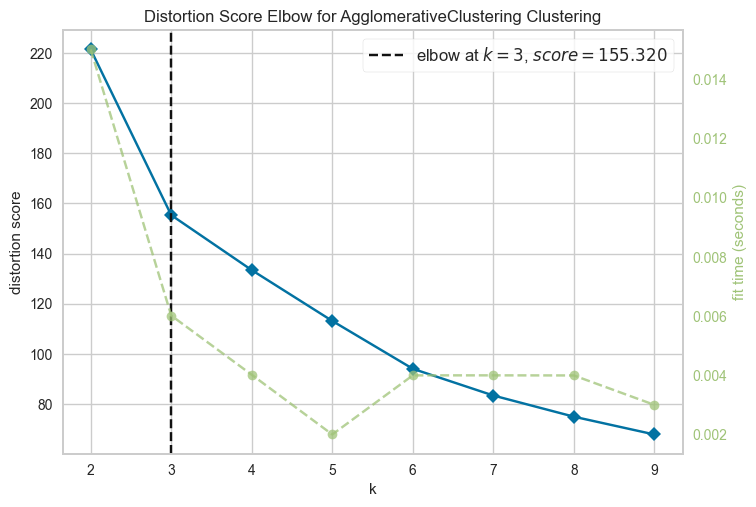

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
#ELBOW
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), timings = True)
visualizer.fit(df_datos_std_clus.iloc[:,0:5])
visualizer.show()

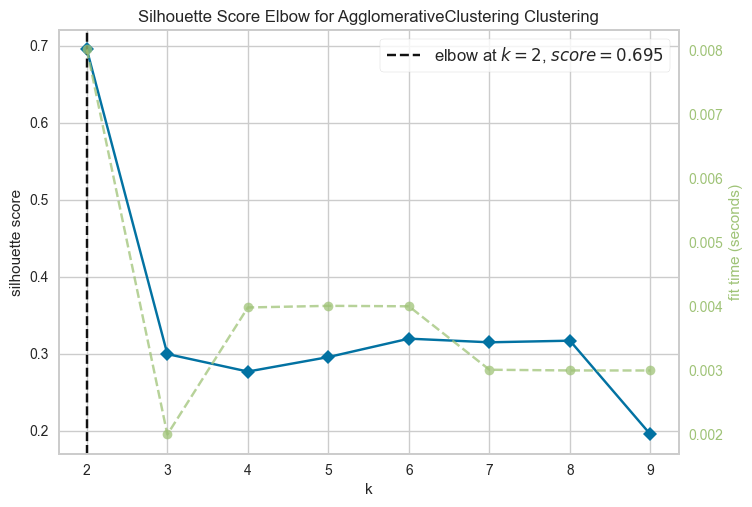

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric="silhouette", timings = True)
visualizer.fit(df_datos_std_clus.iloc[:,0:5])
visualizer.show()

DATOS CON ESTANDARIZADO


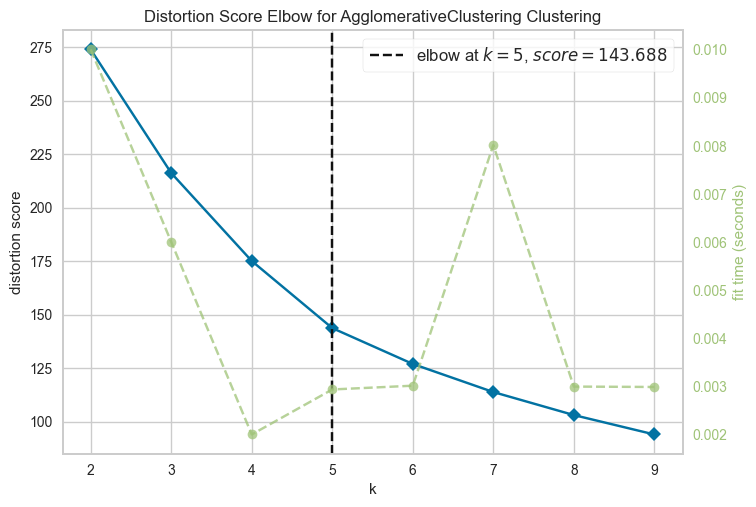

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
#Silhouette
aglomerativoSD = AgglomerativeClustering()
visualizerSD = KElbowVisualizer(aglomerativoSD, k=(2,10), timings = True)
visualizerSD.fit(df_datos_std_clus_std.iloc[:,0:5])
visualizerSD.show()

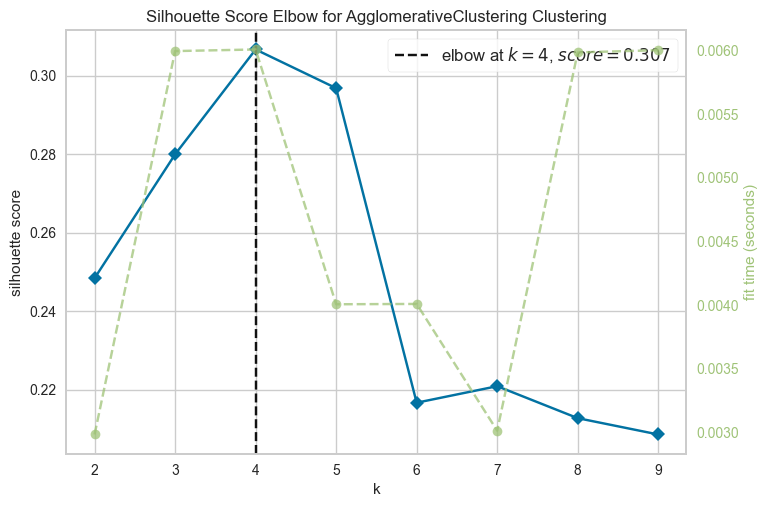

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [19]:
#Silhouette
aglomerativoSD = AgglomerativeClustering()
visualizerSD = KElbowVisualizer(aglomerativoSD, k=(2,10),metric = "silhouette", timings = True)
visualizerSD.fit(df_datos_std_clus_std.iloc[:,0:5])
visualizerSD.show()

# Visualizacion de las Silhoutte 



 https://vitalflux.com/elbow-method-silhouette-score-which-better/#:~:text=Silhouette%20analysis%2Fscores%20and%20related,of%20clusters%20in%20K%2Dmeans.

In [20]:
import matplotlib.pyplot as plt 
from yellowbrick.cluster import SilhouetteVisualizer 

In [21]:
#  Load the IRIS dataset 
fig, ax = plt.subplots(3, 2, figsize=(15,8)) for i in [2, 3, 4, 5, 6, 7]: 
# ''' Create KMeans instance for different number of clusters ''' 
# ''' Create SilhouetteVisualizer instance with KMeans instance Fit the visualizer ''' 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod]) visualizer.fit(X)

SyntaxError: invalid syntax (1269631732.py, line 2)

# EVENTUALMENTE TODO LA GENERACION DEL CLUSTER, Y AGREGAR LAS ETIQUETAS AL DATABASE PODRIA SER COLOCADO EN UNA FUNCION

In [22]:
# Parametros que se deben definir son
# n_clusters
# El metodo de distancia se define usando metric
# Puede ser euclidean, I1, I2, Manhattan, cosine, or precomputed.
# Linkage = {ward, complete, average, single}
Ag = AgglomerativeClustering(n_clusters = 4)

In [23]:
Ag.fit(df_datos_std_clus_std.iloc[:,0:5])

AgglomerativeClustering(n_clusters=4)

In [24]:
Ag_labels = Ag.labels_

In [25]:
df_datos_std_clus_std['Ciudades'] = df_datos_std.Ciudades

In [26]:
df_datos_std_clus_std["cluster"] = Ag_labels

In [27]:
df_datos_std_clus_std['cluster'].value_counts()

1    40
0    25
3     4
2     2
Name: cluster, dtype: int64

In [28]:
df_datos_std_clus_std.to_csv("../cluster/df_datos_std_clus_std_4.csv", encoding = "ISO-8859-1")

II. Ahora tenemos que hacer algo relacionado a la validación de los clusters usando el método del codo u otro método.

### After choosing the best cluster we need to make the graph of contribution to each dimensions 

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns


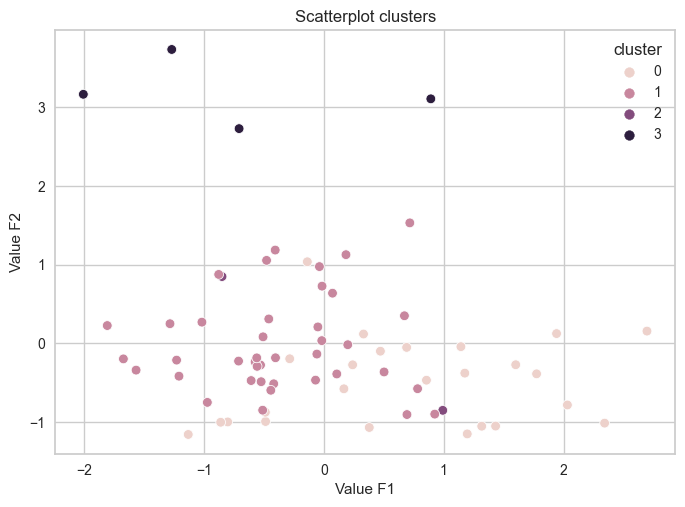

In [30]:
plt.title("Scatterplot clusters")
plt.xlabel("Value F1")
plt.ylabel("Value F2")
sns.scatterplot(data = df_datos_std_clus_std, x = 'F1_sd', y = 'F2_sd', hue = "cluster")
plt.show()

In [31]:
fig = px.scatter(df_datos_std_clus_std,x='F1_sd', y='F2_sd', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [32]:
fig = px.scatter(df_datos_std_clus_std,x='F1_sd', y='F3_sd', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [33]:
fig = px.scatter(df_datos_std_clus_std,x='F1_sd', y='F4_sd', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [34]:
fig = px.scatter(df_datos_std_clus_std,x='F1_sd', y='F5_sd', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [35]:
fig = px.scatter(df_datos_std_clus_std,x='F2_sd', y='F3_sd', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [36]:
fig = px.scatter(df_datos_std_clus_std,x='F2_sd', y='F4_sd', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [37]:
fig = px.scatter(df_datos_std_clus_std,x='F2_sd', y='F5_sd', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [38]:
fig = px.scatter(df_datos_std_clus_std,x='F3_sd', y='F4_sd', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [39]:
fig = px.scatter(df_datos_std_clus_std,x='F3_sd', y='F5_sd', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [40]:
fig = px.scatter(df_datos_std_clus_std,x='F4_sd', y='F5_sd', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [41]:
i3_melt = df_datos_std_clus_std.loc[:,['F1_sd','F2_sd','F3_sd','F4_sd','F5_sd','cluster']].melt(id_vars = 'cluster')

In [4]:
i3_groups_mean = i3_melt.groupby(['variable','cluster'])['value'].mean().reset_index() ### 
i3_groups_mean

NameError: name 'i3_melt' is not defined

In [43]:
import seaborn.objects as so
from seaborn import axes_style

In [44]:
custom_palette = ["red", "green", "blue","black","gray"]

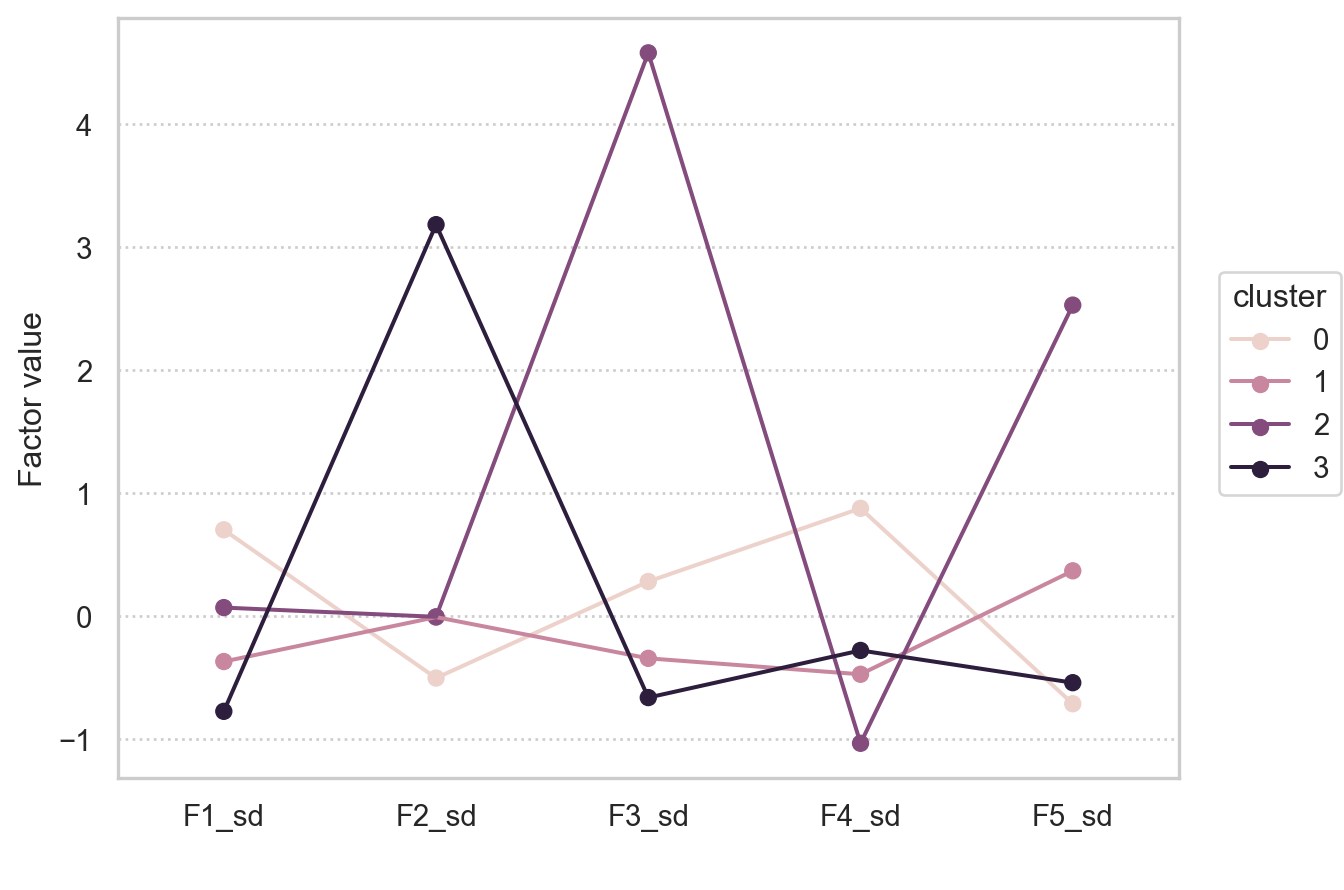

In [45]:
custom_palette = ["red", "green", "blue","black","gray"]

(
    so.Plot(i3_groups_mean, x="variable", y="value", color = "cluster").theme({**axes_style("whitegrid"), "grid.linestyle": ":"})
    .add(so.Dot())
    .add(so.Line())
    .label(
        x = "  ",
        y = "Factor value"
    )
)

 ### Vamos a probar con una nueva combinacion de factores que provienen de Seleccion_1: df_datos_MinMax, nfactors = 5, fm=minchi, rotate = varimax. 

In [48]:
df_datos_MM = pd.read_csv("../cluster/df_datos_MinMax.csv", encoding = "ISO-8859-1")

# Vamos a eliminar Torrejon de ardoz

In [49]:
df_datos_MM[df_datos_MM.loc[:,'Ciudades'] =='Torrejón de Ardoz']

Unnamed: 0        TA  LPI  AREA_MN  AREA_AM   AREA_MD  GYRATE_MN  \
66          66  0.415293  1.0      1.0      1.0  0.254006    0.45873   

    GYRATE_AM  GYRATE_MD       PRD  ...  Viv_vacias       COM  ED_SING  EQUIP  \
66        1.0   0.403079  0.120096  ...    0.017342  0.018133      1.0    0.0   

         IND     OCIO       OFI   RES_PLU   RES_UNI           Ciudades  
66  0.139824  0.00953  0.022687  0.022384  0.016519  Torrejón de Ardoz  

[1 rows x 50 columns]

In [50]:
df_datos_MM = df_datos_MM[df_datos_MM['Ciudades'] != 'Torrejón de Ardoz']

In [51]:
df_datos_MM['F2'] = df_datos_MM.loc[:,"LSI"] * 0.784 + df_datos_MM.loc[:,"TE"] * 0.943 + df_datos_MM.loc[:,"T_Viviendas"] * 0.985 + df_datos_MM.loc[:,"PobT"] * 0.988 + df_datos_MM.loc[:,"Vehiculos"] * 0.995
df_datos_MM['F1'] = df_datos_MM.loc[:,"LPI"] * 0.953 + df_datos_MM.loc[:,"AREA_AM"] * 0.987 + df_datos_MM.loc[:,"GYRATE_AM"] * 0.986 + df_datos_MM.loc[:,"MESH"] * 0.988 + df_datos_MM.loc[:,"ED_SING"] * 0.863
df_datos_MM['F4'] = df_datos_MM.loc[:,"RES_UNI"] * 0.756 + df_datos_MM.loc[:,"SPLIT"] * 0.632 
df_datos_MM['F5'] = df_datos_MM.loc[:,"SHAPE_MN"] * 0.922 + df_datos_MM.loc[:,"SHAPE_MD"] * 0.920 + df_datos_MM.loc[:,"FRAC_MD"] * 0.844
df_datos_MM['F3'] = df_datos_MM.loc[:,"AREA_MN"] * 0.789 + df_datos_MM.loc[:,"AREA_MD"] * 0.861 + df_datos_MM.loc[:,"GYRATE_MN"] * 0.951 + df_datos_MM.loc[:,"GYRATE_MD"] * 0.872 

In [52]:
df_datos_MM_clus = df_datos_MM.loc[:,["F1","F2","F3","F4","F5"]]

In [53]:
std = StandardScaler()
datos_MM_clus_std = std.fit_transform(df_datos_MM_clus)

In [54]:
col = ['F1', 'F2', 'F3', 'F4', 'F5']

In [55]:
df_datos_MM_clus_std = pd.DataFrame(datos_MM_clus_std, columns = col)

In [56]:
df_datos_MM_clus["Ciudades"] = df_datos_MM.Ciudades

In [57]:
df_datos_MM_clus_std["Ciudades"] = df_datos_MM.Ciudades

In [58]:
df_datos_MM_clus_std.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'Ciudades'], dtype='object')

II. Analisis del posible numero de clusters. 

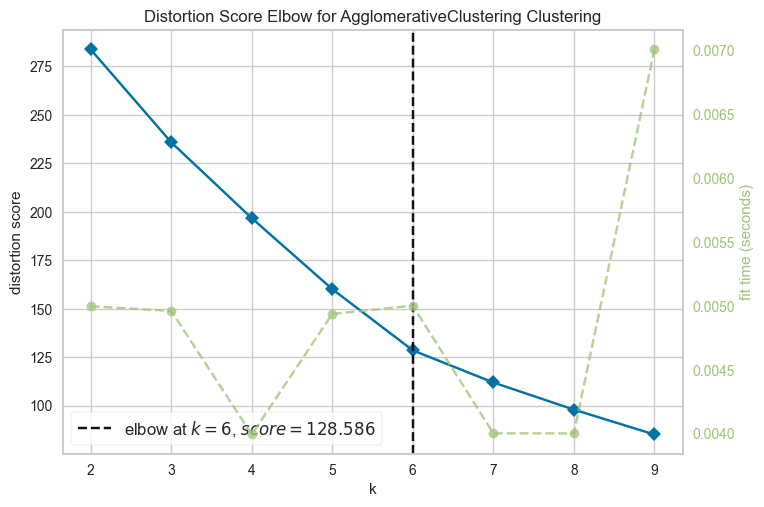

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo,k=(2,10),timings = True)
visualizer.fit(df_datos_MM_clus_std.iloc[:,0:5])
visualizer.show()

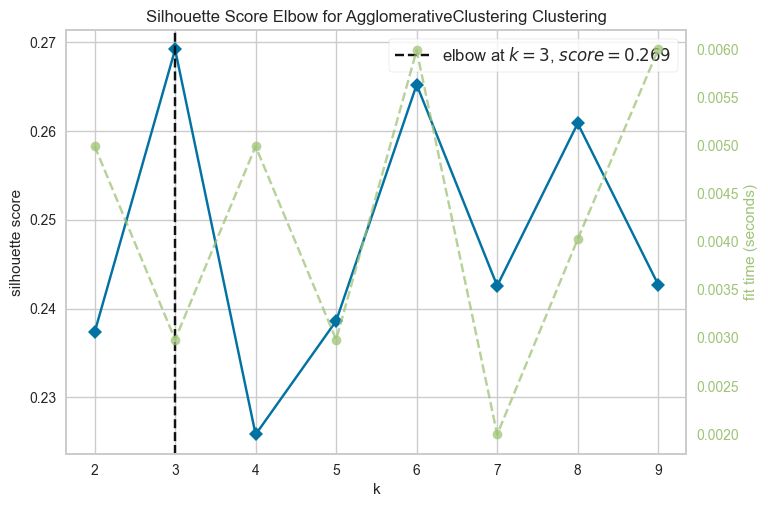

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [60]:
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_MM_clus_std.iloc[:,0:5])
visualizer.show()

# 3. Cluster

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sn

In [62]:
Ag = AgglomerativeClustering(n_clusters=4)

In [63]:
Ag.fit(df_datos_MM_clus_std.iloc[:,0:5])

AgglomerativeClustering(n_clusters=4)

In [64]:
labels = Ag.labels_

In [65]:
df_datos_MM_clus_std["cluster"] = labels

In [66]:
df_datos_MM_clus_std.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'Ciudades', 'cluster'], dtype='object')

In [67]:
df_datos_MM_clus_std['cluster'].value_counts()

1    31
0    21
3    14
2     5
Name: cluster, dtype: int64

In [11]:
df_datos_MM_clus_std.to_csv('../cluster/df_datos_MM_clus_std_4.csv', encoding = "ISO-8859-1")

NameError: name 'df_datos_MM_clus_std' is not defined

In [69]:
im3_melt = df_datos_MM_clus_std.loc[:,['F1','F2','F3','F4','F5','cluster']].melt(id_vars = 'cluster')

In [70]:
im3_groups_mean = im3_melt.groupby(['variable','cluster'])['value'].mean().reset_index() ### 
im3_groups_mean

variable  cluster     value
0        F1        0 -0.538317
1        F1        1  0.537495
2        F1        2 -0.554933
3        F1        3 -0.184501
4        F2        0  0.832398
5        F2        1 -0.442393
6        F2        2 -0.123797
7        F2        3 -0.224799
8        F3        0 -0.255514
9        F3        1 -0.321399
10       F3        2 -0.781541
11       F3        3  1.374063
12       F4        0  1.051845
13       F4        1 -0.657413
14       F4        2  0.154980
15       F4        3 -0.177417
16       F5        0 -0.254167
17       F5        1 -0.010100
18       F5        2  2.886191
19       F5        3 -0.627167

In [71]:
import seaborn.objects as so
from seaborn import axes_style

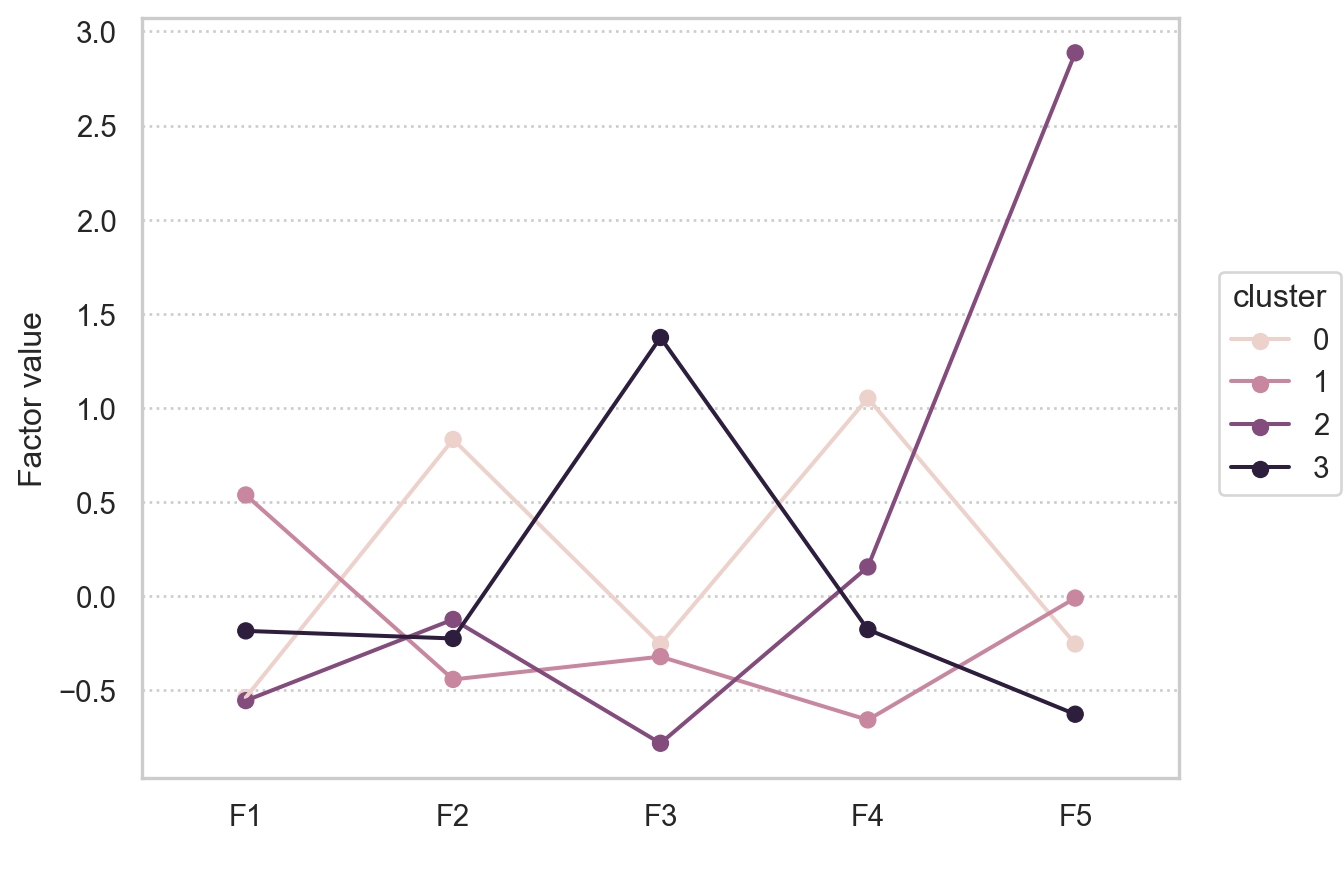

In [73]:
custom_palette = ["red", "green", "blue","black","gray"]

(
    so.Plot(im3_groups_mean, x="variable", y="value", color = "cluster").theme({**axes_style("whitegrid"), "grid.linestyle": ":"})
    .add(so.Dot())
    .add(so.Line())
    .label(
        x = "  ",
        y = "Factor value"
    )
)

## 5. Representacion grafica

In [182]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sn

In [208]:
fig = px.scatter(df_datos_MM_clus_std,x='F1', y='F2', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [219]:
fig = px.scatter(df_datos_MM_clus_std,x='F1', y='F3', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [220]:
fig = px.scatter(df_datos_MM_clus_std,x='F1', y='F4', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [221]:
fig = px.scatter(df_datos_MM_clus_std,x='F1', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [222]:
fig = px.scatter(df_datos_MM_clus_std,x='F2', y='F3', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [223]:
fig = px.scatter(df_datos_MM_clus_std,x='F2', y='F4', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [225]:
fig = px.scatter(df_datos_MM_clus_std,x='F2', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [226]:
fig = px.scatter(df_datos_MM_clus_std,x='F3', y='F4', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [227]:
fig = px.scatter(df_datos_MM_clus_std,x='F3', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [228]:
fig = px.scatter(df_datos_MM_clus_std,x='F4', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

# PRUEBA NÚMERO III. DATOS TRANSFORMADOS

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [12]:
pd.set_option('display.max_rows', None)

In [14]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score
from math import sqrt
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np

In [32]:
df_datos_Ptrans = pd.read_csv(r"C:\Users\crist\Documents\GitHub\manifolds\ciudades\datos\cluster\df_datos_PTrans.csv", encoding = "ISO-8859-1", index_col=[0])

In [33]:
df_datos_Ptrans = df_datos_Ptrans[df_datos_Ptrans['Ciudades'] != 'Torrejón de Ardoz']


In [34]:
df_datos_Ptrans

TA       LPI   AREA_MN   AREA_AM   AREA_MD  GYRATE_MN  GYRATE_AM  \
0   0.660050 -0.215250  0.684610 -0.215862  0.976199   0.929584  -0.349381   
1   0.669338 -0.558490  1.037263  0.409724 -0.277272   0.453895   0.839406   
2   0.439142 -0.245309  2.187655  0.171074  2.453814   2.911929   0.374707   
3  -0.454723  0.000991  1.375026 -0.191186  0.685323   1.587009   0.252967   
4   0.028074 -0.923886 -0.785608 -0.414564 -1.332723  -1.198402  -0.171375   
5   1.382951 -1.356477  0.987950 -0.325188  0.556338   1.067973  -0.407312   
6   0.243930 -0.407836 -1.459777 -0.112986 -1.679528  -1.676421  -0.080967   
7   0.243930 -0.407836 -1.459777 -0.112986 -1.679528  -1.676421  -0.080967   
8   1.280622 -0.522271  0.707736  0.184778 -0.626140   0.409617  -0.026711   
9  -0.693115  0.369525 -1.514731 -0.866276 -1.148900  -1.183590  -1.285889   
10  2.085717 -2.118016 -0.767560  0.275317  0.292858  -0.546271   0.128228   
11  0.776966 -0.887792  1.628007  0.677540  0.856717   1.178216   0.964674   
12 -0.062217  1.643872  0.014518  1.646705 -0.672174  -0.465283   1.476063   
13 -1.865470  0.461265 -0.564571 -1.563246  0.047739  -0.433735  -1.598178   
14  1.325272  0.744400 -0.841512  1.461423 -0.875864  -1.063307   0.865638   
15  0.031434  1.108769 -0.459154  1.011710 -0.873699  -0.610259   0.630965   
16 -1.851182  0.041380 -1.271550 -0.655957 -2.232298  -2.055926  -0.225758   
17 -0.975658  1.190849 -0.219738  0.323088  0.148962  -0.133607  -0.042685   
18  1.912550 -1.976667  0.607907 -0.353412  0.643001   0.861730  -0.448581   
19  0.139029 -0.645018 -0.258862 -0.181699 -0.425788  -0.283061  -0.448581   
20 -1.295126  0.010411 -0.394886 -1.128539 -1.305963  -0.617449  -0.288209   
21  0.929087  0.357181 -0.164358  1.191890 -1.074883  -0.588810   0.890634   
22  0.974311  0.102525  0.578512  0.066380  0.385840   0.782001  -0.461866   
23 -0.089930  0.628397  0.819385  0.373134  1.170016   1.269275   0.132369   
24  0.379525 -0.007136  0.079797  0.362900 -0.415895  -0.313163   0.500829   
25  1.034817  0.043195  1.117280  1.043771  1.339932   1.074415   0.998284   
26 -0.696646 -0.991027 -0.466812 -1.907979  0.565362  -0.021443  -2.065528   
27  0.449140  0.388091 -0.442869  0.465127 -0.878529  -0.879854   0.208833   
28 -0.452705 -0.123163  0.438284 -0.190398 -0.326407   0.161191   0.254497   
29 -0.825584 -0.343015 -0.911209 -0.513261 -0.603434  -0.856542  -0.246835   
30 -0.592498  1.095574 -0.447707  1.100272 -0.460807  -0.783719   1.041956   
31 -1.662823 -0.328373  0.347339 -1.437747  1.354671   0.748789  -0.929071   
32 -0.550090 -0.255468 -1.003867 -0.351474 -1.248373  -0.853895  -0.270838   
33  1.110674  0.586470 -0.267583  1.216146 -0.875864  -0.727376   0.771482   
34  0.633095 -0.594641 -1.721209 -0.827252 -1.381077  -1.877863  -1.251430   
35  0.203272  1.773574  1.139747  1.844307  0.379984   0.651673   1.604679   
36 -0.166853  0.379064  0.174319  0.562843  0.080853  -0.095427   1.134362   
37 -0.034842 -0.515885  0.600381  0.064015  0.344762   0.369695   0.339902   
38 -0.325627 -0.813839  1.340185 -0.664263  1.738710   1.628311   0.290005   
39 -0.789202 -0.496011 -0.665064 -1.340277  0.060960   0.157172  -1.313484   
40 -0.789202 -0.496011 -0.665064 -1.340277  0.060960   0.157172  -1.313484   
41 -0.789202 -0.496011 -0.665064 -1.340277  0.060960   0.157172  -1.313484   
42  1.633954 -0.834835  1.557925  0.634346  2.351795   1.846247   0.556305   
43 -0.921801  0.760370 -1.265365 -0.522804 -0.989034  -1.109684  -1.064545   
44 -1.605333  0.977937 -1.710833 -0.002839 -2.147149  -2.436927   0.049833   
45 -0.269098  0.502758  0.548731  0.422256  0.769612   0.749785   0.355182   
46 -0.269098  0.502758  0.548731  0.422256  0.769612   0.749785   0.355182   
47  0.042053 -1.812975 -0.781105 -1.627460  0.206483  -0.258625  -1.771099   
48 -0.098618  0.118345  0.675266 -0.207088  1.088088   0.809659  -0.250776   
49 -0.838146  0.243262  0.406840  0.118393 -0.101811   0.284778   0.839602   
50  1.533907 -0.007696 -0.100548

In [35]:
df_datos_Ptrans = df_datos_Ptrans.reset_index(drop=True)

In [36]:
df_datos_Ptrans

TA       LPI   AREA_MN   AREA_AM   AREA_MD  GYRATE_MN  GYRATE_AM  \
0   0.660050 -0.215250  0.684610 -0.215862  0.976199   0.929584  -0.349381   
1   0.669338 -0.558490  1.037263  0.409724 -0.277272   0.453895   0.839406   
2   0.439142 -0.245309  2.187655  0.171074  2.453814   2.911929   0.374707   
3  -0.454723  0.000991  1.375026 -0.191186  0.685323   1.587009   0.252967   
4   0.028074 -0.923886 -0.785608 -0.414564 -1.332723  -1.198402  -0.171375   
5   1.382951 -1.356477  0.987950 -0.325188  0.556338   1.067973  -0.407312   
6   0.243930 -0.407836 -1.459777 -0.112986 -1.679528  -1.676421  -0.080967   
7   0.243930 -0.407836 -1.459777 -0.112986 -1.679528  -1.676421  -0.080967   
8   1.280622 -0.522271  0.707736  0.184778 -0.626140   0.409617  -0.026711   
9  -0.693115  0.369525 -1.514731 -0.866276 -1.148900  -1.183590  -1.285889   
10  2.085717 -2.118016 -0.767560  0.275317  0.292858  -0.546271   0.128228   
11  0.776966 -0.887792  1.628007  0.677540  0.856717   1.178216   0.964674   
12 -0.062217  1.643872  0.014518  1.646705 -0.672174  -0.465283   1.476063   
13 -1.865470  0.461265 -0.564571 -1.563246  0.047739  -0.433735  -1.598178   
14  1.325272  0.744400 -0.841512  1.461423 -0.875864  -1.063307   0.865638   
15  0.031434  1.108769 -0.459154  1.011710 -0.873699  -0.610259   0.630965   
16 -1.851182  0.041380 -1.271550 -0.655957 -2.232298  -2.055926  -0.225758   
17 -0.975658  1.190849 -0.219738  0.323088  0.148962  -0.133607  -0.042685   
18  1.912550 -1.976667  0.607907 -0.353412  0.643001   0.861730  -0.448581   
19  0.139029 -0.645018 -0.258862 -0.181699 -0.425788  -0.283061  -0.448581   
20 -1.295126  0.010411 -0.394886 -1.128539 -1.305963  -0.617449  -0.288209   
21  0.929087  0.357181 -0.164358  1.191890 -1.074883  -0.588810   0.890634   
22  0.974311  0.102525  0.578512  0.066380  0.385840   0.782001  -0.461866   
23 -0.089930  0.628397  0.819385  0.373134  1.170016   1.269275   0.132369   
24  0.379525 -0.007136  0.079797  0.362900 -0.415895  -0.313163   0.500829   
25  1.034817  0.043195  1.117280  1.043771  1.339932   1.074415   0.998284   
26 -0.696646 -0.991027 -0.466812 -1.907979  0.565362  -0.021443  -2.065528   
27  0.449140  0.388091 -0.442869  0.465127 -0.878529  -0.879854   0.208833   
28 -0.452705 -0.123163  0.438284 -0.190398 -0.326407   0.161191   0.254497   
29 -0.825584 -0.343015 -0.911209 -0.513261 -0.603434  -0.856542  -0.246835   
30 -0.592498  1.095574 -0.447707  1.100272 -0.460807  -0.783719   1.041956   
31 -1.662823 -0.328373  0.347339 -1.437747  1.354671   0.748789  -0.929071   
32 -0.550090 -0.255468 -1.003867 -0.351474 -1.248373  -0.853895  -0.270838   
33  1.110674  0.586470 -0.267583  1.216146 -0.875864  -0.727376   0.771482   
34  0.633095 -0.594641 -1.721209 -0.827252 -1.381077  -1.877863  -1.251430   
35  0.203272  1.773574  1.139747  1.844307  0.379984   0.651673   1.604679   
36 -0.166853  0.379064  0.174319  0.562843  0.080853  -0.095427   1.134362   
37 -0.034842 -0.515885  0.600381  0.064015  0.344762   0.369695   0.339902   
38 -0.325627 -0.813839  1.340185 -0.664263  1.738710   1.628311   0.290005   
39 -0.789202 -0.496011 -0.665064 -1.340277  0.060960   0.157172  -1.313484   
40 -0.789202 -0.496011 -0.665064 -1.340277  0.060960   0.157172  -1.313484   
41 -0.789202 -0.496011 -0.665064 -1.340277  0.060960   0.157172  -1.313484   
42  1.633954 -0.834835  1.557925  0.634346  2.351795   1.846247   0.556305   
43 -0.921801  0.760370 -1.265365 -0.522804 -0.989034  -1.109684  -1.064545   
44 -1.605333  0.977937 -1.710833 -0.002839 -2.147149  -2.436927   0.049833   
45 -0.269098  0.502758  0.548731  0.422256  0.769612   0.749785   0.355182   
46 -0.269098  0.502758  0.548731  0.422256  0.769612   0.749785   0.355182   
47  0.042053 -1.812975 -0.781105 -1.627460  0.206483  -0.258625  -1.771099   
48 -0.098618  0.118345  0.675266 -0.207088  1.088088   0.809659  -0.250776   
49 -0.838146  0.243262  0.406840  0.118393 -0.101811   0.284778   0.839602   
50  1.533907 -0.007696 -0.100548

In [17]:
df_datos_Ptrans['F1'] = df_datos_Ptrans.loc[:,"LSI"] * 0.810 + df_datos_Ptrans.loc[:,"TE"] * 0.924 + df_datos_Ptrans.loc[:,"T_Viviendas"] * 0.979 + df_datos_Ptrans.loc[:,"PobT"] * 0.979 + df_datos_Ptrans.loc[:,"Vehiculos"] * 0.965 
df_datos_Ptrans['F2'] = df_datos_Ptrans.loc[:,"ED"] * 0.930 + df_datos_Ptrans.loc[:,"AREA_MN"] * -0.878
df_datos_Ptrans['F3'] = df_datos_Ptrans.loc[:,"SHEI"] * 0.991 + df_datos_Ptrans.loc[:,"SIDI"] * 0.951 
df_datos_Ptrans['F4'] = df_datos_Ptrans.loc[:,"LPI"] * -0.821 + df_datos_Ptrans.loc[:,"AREA_AM"] * -0.862 + df_datos_Ptrans.loc[:,"MESH"] * -0.881 + df_datos_Ptrans.loc[:,"SPLIT"] * 0.804 + df_datos_Ptrans.loc[:,"DIVISION"] * 0.793
df_datos_Ptrans['F5'] = df_datos_Ptrans.loc[:,"RES_UNI"] * -0.784

In [18]:
df_datos_Ptrans_clus = df_datos_Ptrans.loc[:,['F1','F2','F3','F4','F5']]

In [19]:
df_datos_Ptrans_clus['Ciudades'] = df_datos_Ptrans['Ciudades']

In [20]:
std = StandardScaler()
datos_Ptrans_clus_std = std.fit_transform(df_datos_Ptrans_clus.iloc[:,0:5])

In [9]:
col = ['F1', 'F2', 'F3', 'F4', 'F5']

In [10]:
df_datos_Ptrans_clus_std = pd.DataFrame(datos_Ptrans_clus_std, columns = col)

In [11]:
df_datos_Ptrans_clus_std['Ciudades'] = df_datos_Ptrans['Ciudades']

In [12]:
df_datos_Ptrans_clus_std

F1        F2        F3        F4        F5           Ciudades
0   0.227217 -0.640045 -0.122274  0.466785 -0.724467           Albacete
1   0.055980 -1.244665  0.053472  0.041664  1.185869  Alcalá de Henares
2  -0.447147 -2.152661  0.053472  0.091551 -1.078103         Alcobendas
3  -0.494557 -1.389489 -0.026553  0.050738  1.305855           Alcorcón
4  -0.168570  0.605279 -1.886507  0.604534 -1.851174          Algeciras
..       ...       ...       ...       ...       ...                ...
66  1.651625  0.774760 -0.837797  0.181439  1.245655                NaN
67  0.685674 -1.640736  0.124318 -0.486423  0.527706           Valencia
68  1.146653  0.601389 -1.339278 -0.518387 -1.440387         Valladolid
69 -1.314090  0.229596  0.326386 -1.514164  0.186127               Vigo
70  1.473234 -1.292156 -0.438391  0.341038  0.670616             Zamora

[71 rows x 6 columns]

# II. Evaluacion numero de clusters

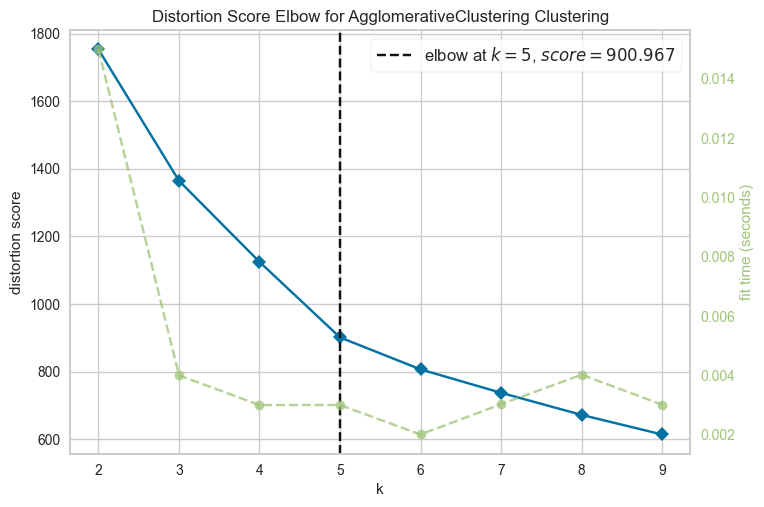

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
Aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(Aglomerativo, k = (2,10), timings = True)
visualizer.fit(df_datos_Ptrans_clus.iloc[:,0:5])
visualizer.show()

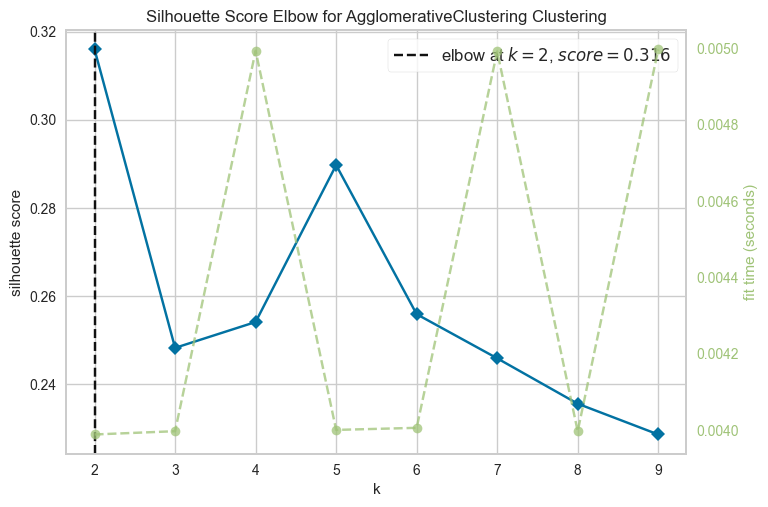

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [14]:
visualizer_sil = KElbowVisualizer(Aglomerativo, k = (2,10), metric = "silhouette",
                                  timings = True)
visualizer_sil.fit(df_datos_Ptrans_clus.iloc[:,0:5])

visualizer_sil.show()



### Evaluación factores estandarizados 

<bound method Visualizer.show of KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=AgglomerativeClustering(n_clusters=9), k=(2, 10))>

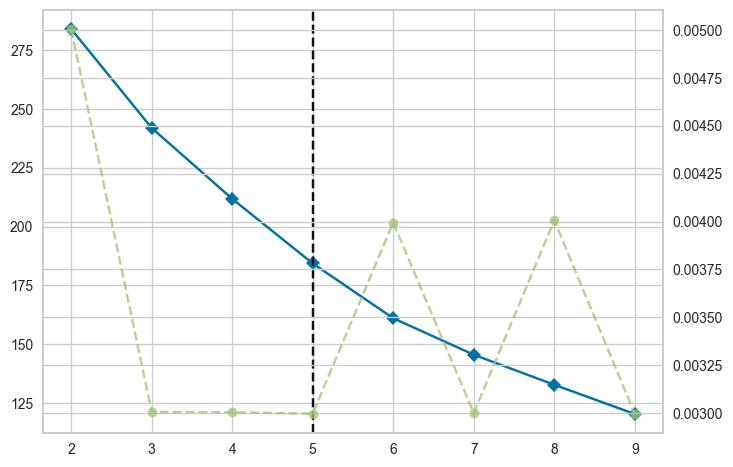

In [15]:
Aglomerativo_clus = AgglomerativeClustering()
visualizer_std = KElbowVisualizer(Aglomerativo_clus, k = (2,10))
visualizer_std.fit(df_datos_Ptrans_clus_std.iloc[:,0:5])
visualizer_std.show

<bound method Visualizer.show of KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=AgglomerativeClustering(n_clusters=9), k=(2, 10),
                 metric='silhouette')>

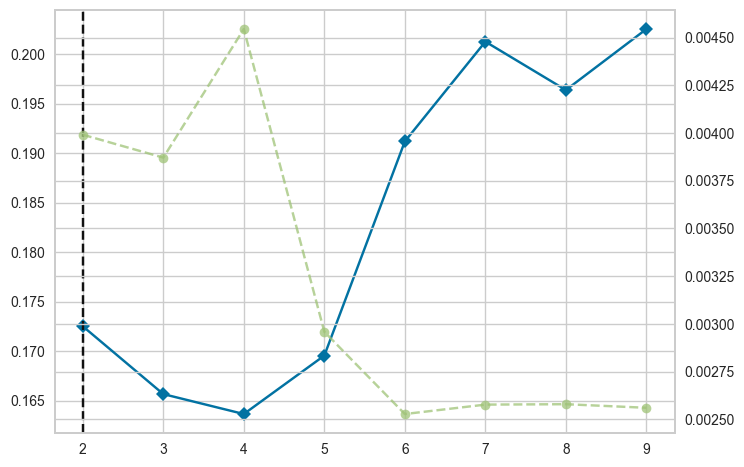

In [16]:
Aglomerativo_clus = AgglomerativeClustering()
visualizer_std_sil = KElbowVisualizer(Aglomerativo_clus, k = (2,10), metric = 'silhouette')
visualizer_std_sil.fit(df_datos_Ptrans_clus_std.iloc[:,0:5])
visualizer_std_sil.show

# III. Calcular los clusters 

In [23]:
Ag = AgglomerativeClustering(n_clusters=5)

In [24]:
Ag.fit(df_datos_Ptrans_clus.iloc[:,0:5])

AgglomerativeClustering(n_clusters=5)

In [25]:
df_datos_Ptrans_clus['cluster'] = Ag.labels_

In [27]:
df_datos_Ptrans_clus['cluster'].value_counts()

0    29
3    14
2    13
1    10
4     5
Name: cluster, dtype: int64

In [77]:
df_datos_Ptrans_clus.to_csv('../cluster/df_datos_Ptrans_clus_5.csv', index = False, encoding = "ISO-8859-1")

### Calculo de las medias de los grupos

In [96]:
df_datos_MM_clus_melt = df_datos_Ptrans_clus.loc[:,['F1','F2','F3','F4','F5','cluster']].melt(id_vars='cluster')

In [99]:
df_datos_MM_clus_melt_mean = df_datos_MM_clus_melt.groupby(['variable','cluster'])['value'].mean().reset_index()

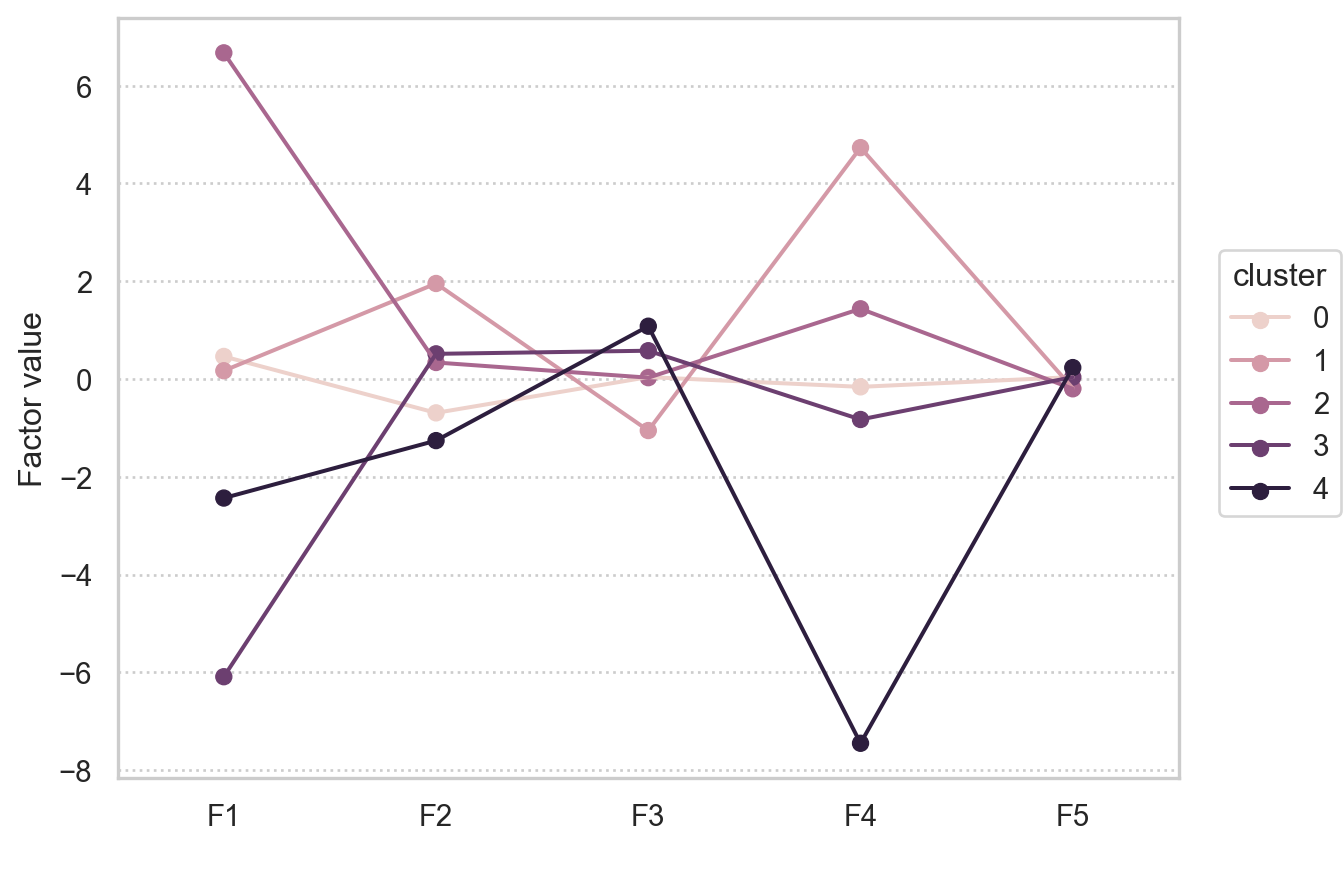

In [106]:
(
    so.Plot(df_datos_MM_clus_melt_mean, x="variable", y="value", color = "cluster").theme({**axes_style("whitegrid"), "grid.linestyle": ":"})
    .add(so.Dot())
    .add(so.Line())
    .label(
        x = "  ",
        y = "Factor value"
    )
)

### Datos con factores estandarizados

In [54]:
Ag_std = AgglomerativeClustering(n_clusters = 5)
Ag_std.fit(df_datos_Ptrans_clus_std.iloc[:,0:5])



AgglomerativeClustering(n_clusters=5)

In [59]:
df_datos_Ptrans_clus_std['cluster'] = Ag_std.labels_

In [60]:
df_datos_Ptrans_clus_std['cluster'].value_counts()

0    21
1    19
3    13
2    11
4     7
Name: cluster, dtype: int64

In [79]:
df_datos_Ptrans_clus_std_metl = df_datos_Ptrans_clus_std.loc[:,['F1','F2','F3','F4','F5','cluster']].melt(id_vars = 'cluster')

In [101]:
df_datos_Ptrans_clus_std_metl_media = df_datos_Ptrans_clus_std_metl.groupby(['variable','cluster'])['value'].mean().reset_index()


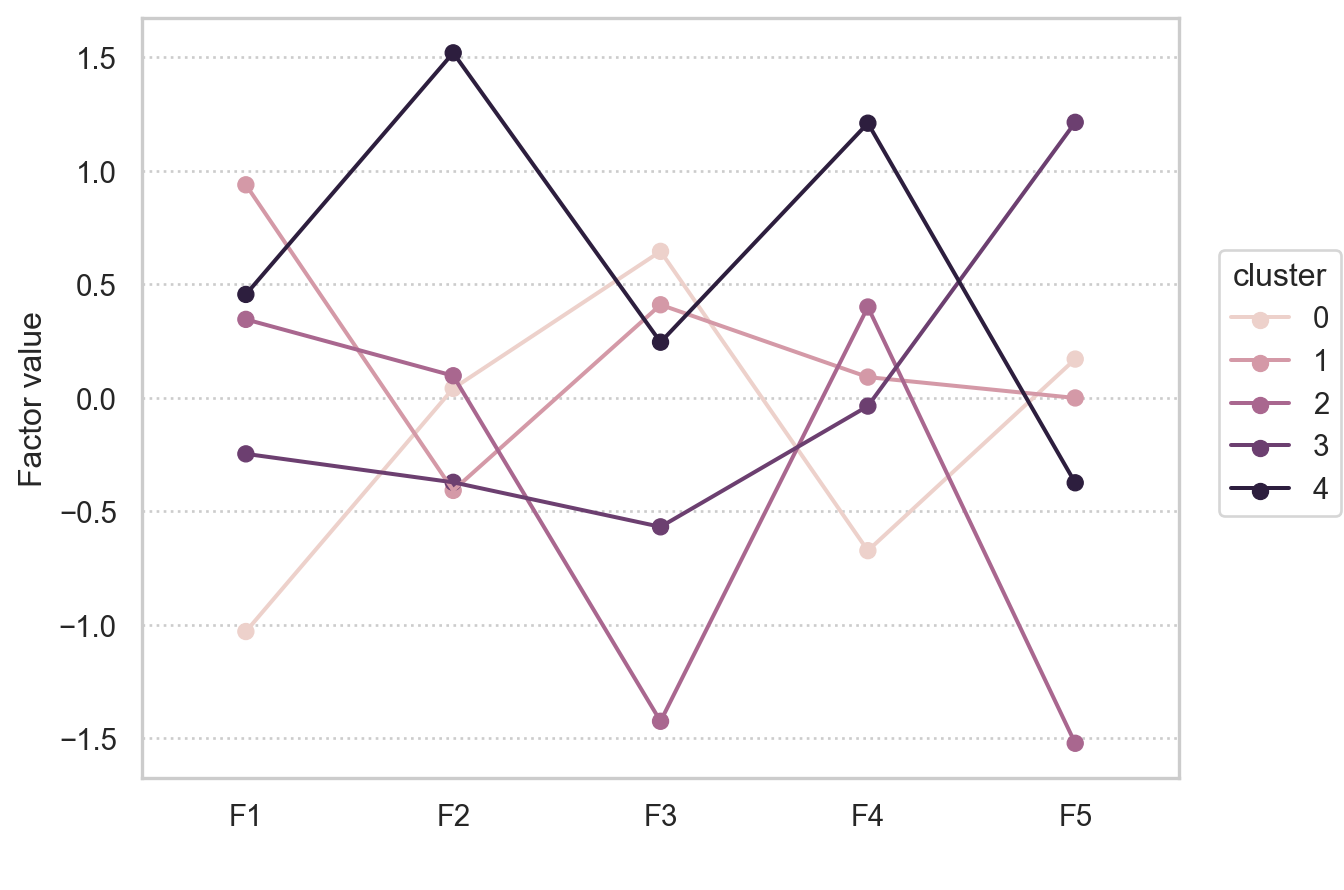

In [104]:
(
    so.Plot(df_datos_Ptrans_clus_std_metl_media, x="variable", y="value", color = "cluster").theme({**axes_style("whitegrid"), "grid.linestyle": ":"})
    .add(so.Dot())
    .add(so.Line())
    .label(
        x = "  ",
        y = "Factor value"
    )
)

In [91]:
import seaborn.objects as so
from seaborn import axes_style

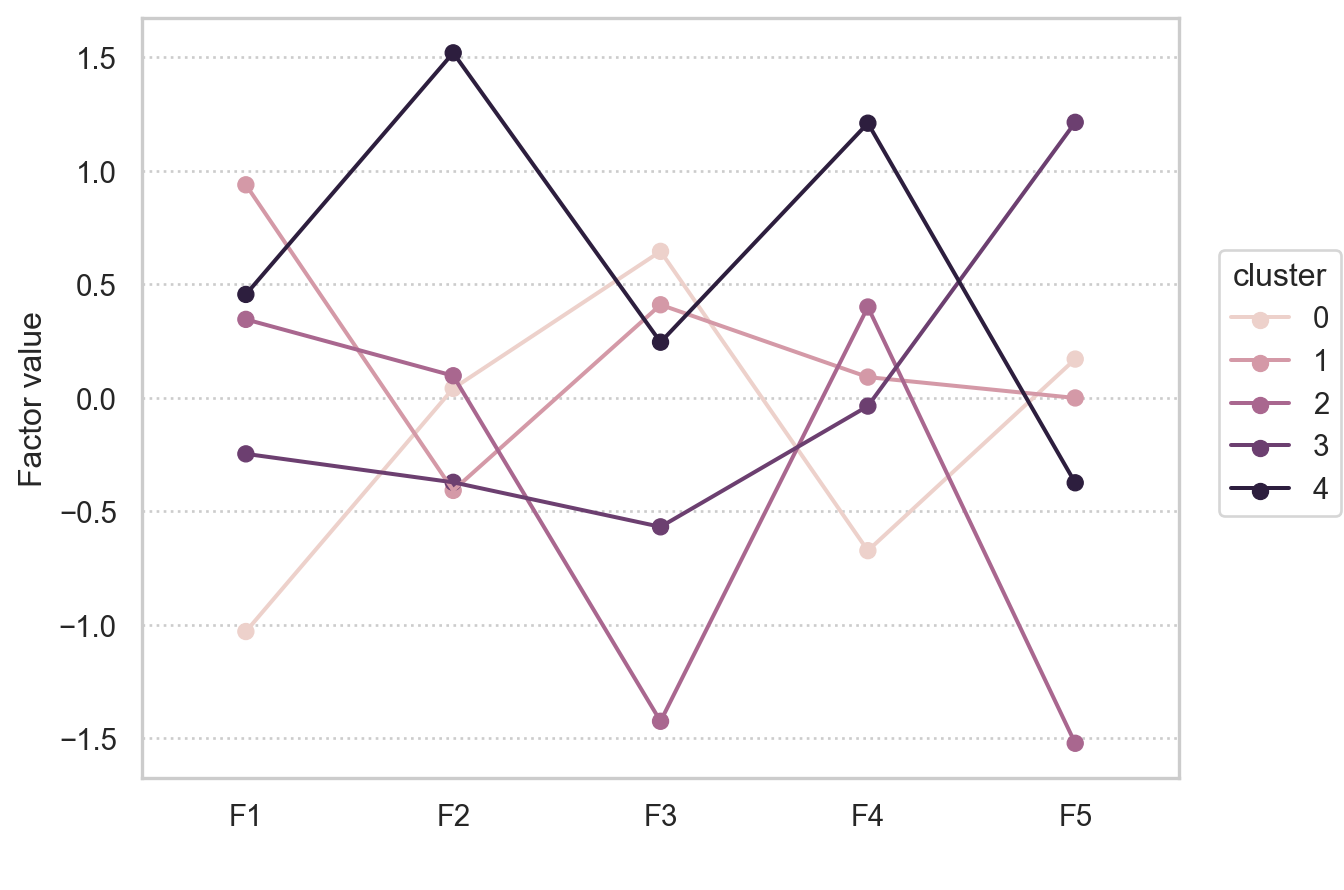

In [92]:
(
    so.Plot(df_df_datos_Ptrans_clus_std_metl_media, x="variable", y="value", color = "cluster").theme({**axes_style("whitegrid"), "grid.linestyle": ":"})
    .add(so.Dot())
    .add(so.Line())
    .label(
        x = "  ",
        y = "Factor value"
    )
)

In [76]:
df_datos_Ptrans_clus_std.to_csv('../cluster/df_datos_Ptrans_clus_std_5.csv', index = False, encoding = "ISO-8859-1")

# IV. Representacion grafica

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns

In [61]:
fig = px.scatter(df_datos_Ptrans_clus_std,x='F1', y='F2', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [62]:
fig = px.scatter(df_datos_Ptrans_clus_std,x='F1', y='F3', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [36]:
fig = px.scatter(df_datos_Ptrans_clus,x='F1', y='F4', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [75]:
fig  =  px.scatter(df_datos_Ptrans_clus_std, x = "F1", y = "F5", color = 'cluster',
                       hover_data = ['Ciudades','cluster'])

fig

In [107]:
fig = px.scatter(df_datos_Ptrans_clus_std,x = 'F2', y = 'F3',  color = 'cluster', hover_data = ['Ciudades','cluster'])
fig

In [73]:
fig = px.scatter(df_datos_Ptrans_clus_std,x = 'F2', y = 'F4',  color = 'cluster', hover_data = ['Ciudades','cluster'])
fig

In [72]:
fig = px.scatter(df_datos_Ptrans_clus_std,x = 'F2', y = 'F5',  color = 'cluster', hover_data = ['Ciudades','cluster'])
fig

In [71]:
fig = px.scatter(df_datos_Ptrans_clus_std,x = 'F3', y = 'F4',  color = 'cluster', hover_data = ['Ciudades','cluster'])
fig

In [70]:
fig = px.scatter(df_datos_Ptrans_clus_std,x = 'F3', y = 'F5',  color = 'cluster', hover_data = ['Ciudades','cluster'])
fig

In [68]:
fig = px.scatter(df_datos_Ptrans_clus_std,x = 'F4', y = 'F5',  color = 'cluster', hover_data = ['Ciudades','cluster'])
fig

# V. Evaluar nuevos cluster del ultimo analisis factorial comparando el cambio entre los datos transformados y la desviacion con los datos de desviacion estandar.

In [48]:
data_types = {
    'Ciudades' : 'string'
}

In [49]:
df_datos_std = pd.read_csv("../cluster/df_datos_std.csv", encoding = "ISO-8859-1", index_col = [0], dtype = data_types)
df_datos_MM = pd.read_csv("../cluster/df_datos_MinMax.csv", encoding = "ISO-8859-1", index_col = [0], dtype = data_types)
df_datos_Ptrans = pd.read_csv(r"C:\Users\crist\Documents\GitHub\manifolds\ciudades\datos\cluster\df_datos_PTrans.csv", encoding = "ISO-8859-1", index_col = [0], dtype = data_types)

In [50]:
df_datos_std = df_datos_std[df_datos_std['Ciudades'] != 'Torrejón de Ardoz']
df_datos_std = df_datos_std.reset_index(drop = True)
# df_datos_std = df_datos_std[df_datos_std['Ciudades'] != 'Madrid']
# df_datos_std = df_datos_std[df_datos_std['Ciudades'] != 'Barcelona']

In [51]:
df_datos_std

TA       LPI   AREA_MN   AREA_AM   AREA_MD  GYRATE_MN  GYRATE_AM  \
0   0.314551 -0.258187  0.327368 -0.138066  0.720840   0.870314  -0.206070   
1   0.325526 -0.318266  0.705764 -0.122950 -0.387012   0.336316   0.005115   
2   0.074800 -0.264027  3.601412 -0.129781  4.344291   3.994473  -0.099764   
3  -0.582591 -0.212224  1.174510 -0.137616  0.406034   1.724994  -0.121478   
4  -0.279679 -0.369264 -0.678931 -0.141376 -1.005513  -1.104946  -0.184355   
5   1.453683 -0.417229  0.647254 -0.139951  0.280396   1.038218  -0.212656   
6  -0.106767 -0.293589 -0.985680 -0.136129 -1.173789  -1.429581  -0.172384   
7  -0.106767 -0.293589 -0.985680 -0.136129 -1.173789  -1.429581  -0.172384   
8   1.250681 -0.312552  0.349648 -0.129431 -0.612741   0.289779  -0.164863   
9  -0.698666 -0.113813 -1.008149 -0.147290 -0.910359  -1.094327  -0.291057   
10  3.418591 -0.479655 -0.669807 -0.126996  0.045265  -0.601867  -0.141852   
11  0.458495 -0.364710  1.638580 -0.112907  0.585706   1.176348   0.041400   
12 -0.344428  0.730292 -0.211510 -0.017585 -0.640756  -0.533947   0.249832   
13 -1.065158 -0.084230 -0.563273 -0.153559 -0.151786  -0.507139  -0.311821   
14  1.337221  0.024484 -0.706851 -0.050239 -0.760316  -1.006769   0.012367   
15 -0.277188  0.219816 -0.504895 -0.094762 -0.759081  -0.654630  -0.046916   
16 -1.062145 -0.202790 -0.906082 -0.144773 -1.416233  -1.664261  -0.191239   
17 -0.814097  0.276239 -0.363512 -0.125621 -0.072681  -0.241872  -0.167105   
18  2.822687 -0.469704  0.255607 -0.140412  0.363964   0.790148  -0.217216   
19 -0.194163 -0.331396 -0.387515 -0.137441 -0.486154  -0.376325  -0.217216   
20 -0.921099 -0.210050 -0.468191 -0.149970 -0.991933  -0.660509  -0.198868   
21  0.666048 -0.117616 -0.328891 -0.080794 -0.870759  -0.637031   0.019443   
22  0.732580 -0.187938  0.228936 -0.132313  0.125225   0.697709  -0.218661   
23 -0.363482 -0.023617  0.461766 -0.124107  0.960624   1.293479  -0.141204   
24  0.016564 -0.214088 -0.166383 -0.124423 -0.479697  -0.402833  -0.075082   
25  0.825320 -0.202359  0.805389 -0.092546  1.196230   1.046181   0.051892   
26 -0.700248 -0.377487 -0.509211 -0.155840  0.288943  -0.137764  -0.338190   
27  0.084820 -0.108016 -0.495677 -0.121110 -0.761835  -0.868557  -0.128891   
28 -0.581525 -0.239496  0.107486 -0.137602 -0.420344   0.037900  -0.121217   
29 -0.755505 -0.282190 -0.740962 -0.142839 -0.598782  -0.850577  -0.193846   
30 -0.651965  0.211257 -0.498421 -0.088376 -0.508851  -0.793790   0.066052   
31 -1.019803 -0.279545  0.033396 -0.152615  1.217977   0.659753  -0.263369   
32 -0.631303 -0.265973 -0.785162 -0.140381 -0.962399  -0.848530  -0.196774   
33  0.947937 -0.039717 -0.392815 -0.078594 -0.760316  -0.749198  -0.012888   
34  0.283130 -0.323839 -1.089696 -0.146850 -1.029824  -1.556534  -0.288582   
35 -0.141431  0.931289  0.834483  0.037591  0.120097   0.550578   0.325691   
36 -0.414453 -0.110847 -0.098654 -0.117581 -0.126240  -0.206749   0.098152   
37 -0.325235 -0.311531  0.248736 -0.132367  0.089518   0.248256  -0.106171   
38 -0.511337 -0.355072  1.119558 -0.144880  1.882726   1.783824  -0.115074   
39 -0.740395 -0.308325 -0.616937 -0.151834 -0.141624   0.033951  -0.293010   
40 -0.740395 -0.308325 -0.616937 -0.151834 -0.141624   0.033951  -0.293010   
41 -0.740395 -0.308325 -0.616937 -0.151834 -0.141624   0.033951  -0.293010   
42  2.028726 -0.357852  1.496780 -0.114741  3.768903   2.105398  -0.063435   
43 -0.793740  0.031548 -0.903394 -0.142975 -0.823847  -1.040809  -0.274443   
44 -1.005851  0.140501 -1.085702 -0.133858 -1.380716  -1.881539  -0.153792   
45 -0.478070 -0.070039  0.202359 -0.122543  0.492451   0.660886  -0.103378   
46 -0.478070 -0.070039  0.202359 -0.122543  0.492451   0.660886  -0.103378   
47 -0.269276 -0.457345 -0.676659 -0.154017 -0.026338  -0.354667  -0.322169   
48 -0.369379 -0.183979  0.318452 -0.137907  0.855879   0.729563  -0.194330   
49 -0.760638 -0.150897  0.081477 -0.131086 -0.263368   0.161282   0.005168   
50  1.785372 -0.214216 -0.288022

In [52]:
df_datos_Ptrans = df_datos_Ptrans[df_datos_Ptrans['Ciudades'] != 'Torrejón de Ardoz']
df_datos_Ptrans = df_datos_Ptrans.reset_index(drop = True)
# df_datos_Ptrans = df_datos_Ptrans[df_datos_Ptrans['Ciudades'] != 'Madrid']
# df_datos_Ptrans = df_datos_Ptrans[df_datos_Ptrans['Ciudades'] != 'Barcelona']

In [53]:
df_datos_std['F2'] = df_datos_std.loc[:,"LPI"] * 0.944 + df_datos_std.loc[:,"MESH"] * 0.988 + df_datos_std.loc[:,"ED_SING"] * 0.854   
df_datos_std['F4'] = df_datos_std.loc[:,"RES_UNI"] * 0.756 + df_datos_std.loc[:,"SPLIT"] * 0.558 + df_datos_std.loc[:,"TA"] * 0.577 
df_datos_std['F1'] = df_datos_std.loc[:,"ED"] * 0.875 + df_datos_std.loc[:,"IJI"] * 0.588 + df_datos_std.loc[:,"RES_PLU"] * 0.5230
df_datos_std['F3'] = df_datos_std.loc[:,"LSI"] * 0.828 + df_datos_std.loc[:,"T_Viviendas"] * 0.885
df_datos_std['F5'] = df_datos_std.loc[:,"RNMDP_2020"] * 0.692 + df_datos_std.loc[:,"OFI"] * 0.598 

In [54]:
df_datos_Ptrans.columns

Index(['TA', 'LPI', 'AREA_MN', 'AREA_AM', 'AREA_MD', 'GYRATE_MN', 'GYRATE_AM',
       'GYRATE_MD', 'PRD', 'SHDI', 'SIDI', 'MSIDI', 'SHEI', 'SIEI', 'MSIEI',
       'NP', 'DIVISION', 'SPLIT', 'MESH', 'PAFRAC', 'SHAPE_MN', 'SHAPE_MD',
       'PARA_MN', 'PARA_MD', 'FRAC_MD', 'SQUARE_MN', 'SQUARE_MD', 'IJI', 'LSI',
       'TE', 'ED', 'RNMDP_2020', 'PobT', 'PobH', 'PobM', 'Vehiculos',
       'T_Viviendas', 'T_Viv_Prin', 'T_Viv_Sec', 'Viv_vacias', 'COM',
       'ED_SING', 'EQUIP', 'IND', 'OCIO', 'OFI', 'RES_PLU', 'RES_UNI',
       'Ciudades'],
      dtype='object')

In [55]:
df_datos_Ptrans['F1'] = df_datos_Ptrans.loc[:,"AREA_MN"] * -0.815 + df_datos_Ptrans.loc[:,"ED"] * 0.913 + df_datos_Ptrans.loc[:,"RES_PLU"] * 0.654
df_datos_Ptrans['F3'] = df_datos_Ptrans.loc[:,"LSI"] * 0.755 + df_datos_Ptrans.loc[:,"T_Viviendas"] * 0.957
df_datos_Ptrans['F2'] = df_datos_Ptrans.loc[:,"LPI"] * -0.848 + df_datos_Ptrans.loc[:,"SPLIT"] * 0.834 + df_datos_Ptrans.loc[:,"MESH"] * -0.764
df_datos_Ptrans['F4'] = df_datos_Ptrans.loc[:,"RES_UNI"] * -0.817 
df_datos_Ptrans['F5'] = df_datos_Ptrans.loc[:,"SIDI"] * 0.751

In [56]:
df_datos_std_clus = df_datos_std.loc[:,['F1','F2','F3','F4','F5']]

In [57]:
df_datos_std_clus['Ciudades'] = df_datos_std['Ciudades']

In [58]:
df_datos_std_clus

F1        F2        F3        F4        F5  \
0  -1.074076 -0.499535 -0.262900  0.932916 -0.310524   
1  -1.512909 -0.130561 -0.666915 -0.677661  1.067688   
2  -1.090182 -0.146921 -1.215588  0.815330  5.759454   
3  -1.588110 -0.455778 -1.051343 -1.421749 -0.034796   
4  -0.482617 -1.057777 -0.332374  1.550306 -1.294706   
5  -0.729549 -1.008248  0.621534  2.551842 -0.793914   
6   1.082289 -0.572075  0.365246  0.427055 -0.667998   
7  -0.831704 -0.471799 -1.049527 -0.279668 -0.250629   
8  -1.904311 -1.011019 -0.116235  3.280585 -0.759328   
9   2.874770 -0.218637 -0.010930 -0.813983 -0.376222   
10  3.527003 -0.904513  5.212843  2.470414  3.275636   
11 -2.535878 -0.444890 -0.700876 -0.702097  0.199937   
12 -1.270688  0.435433 -0.751307 -0.583760 -0.301163   
13  1.722600 -0.059473 -1.024728 -2.044242  0.471975   
14  0.191055 -0.376096  1.043554  1.337410 -1.276427   
15  1.084290  0.486386 -0.291085 -0.699850 -0.509873   
16  0.129189  0.770519 -1.094840 -0.895447 -0.351503   
17  0.476278 -0.318118 -1.020626 -0.880741  0.817672   
18 -1.600686 -1.004359  1.154394  4.975210 -0.838343   
19 -0.108861 -0.579592 -0.002752 -0.443733  0.808056   
20 -0.421997 -0.159311 -1.090695 -1.005063  0.248050   
21 -1.806367 -0.443801 -0.155484  0.982840 -1.262195   
22 -1.068224 -0.921534  0.129479  1.920803 -1.817530   
23  0.032509 -0.511500 -0.615362 -1.474008 -1.169551   
24 -1.872815 -0.247750 -0.526410 -0.575999 -0.043980   
25 -1.639763 -0.833578  0.045320  0.290926  0.183303   
26  0.989480 -0.942158 -0.628882  0.336949  0.659504   
27  0.333073 -0.281645  0.210089 -0.428214  0.264008   
28 -0.303159 -0.638460 -1.027024 -0.709648  0.163283   
29  2.022114 -0.938332 -0.454326 -1.746985 -0.462644   
30 -0.223435  0.205131 -0.697789 -1.638575 -0.936073   
31  0.084895 -0.401742 -1.286055 -1.644621  0.346190   
32 -0.228016 -0.342308 -0.488568 -0.650501 -0.343491   
33 -0.672855  0.423042  0.310310  0.895381 -1.421949   
34  2.631586 -0.578444  1.375842  1.094535  0.010900   
35 -1.981437  2.319996 -0.822928 -1.570344 -0.283336   
36 -0.023545 -0.667323 -0.613063 -1.232501  1.055969   
37 -0.182894 -0.464355 -0.741801 -0.885645  0.084740   
38 -0.548094 -0.116512 -0.931061 -1.370931 -0.048313   
39  1.582975 -0.335658 -0.423460 -0.778850  0.012447   
40 -0.388558  0.290865  9.399072 -0.767747  3.701679   
41 -0.172103 -0.712171  2.012185  1.485031 -0.253297   
42 -1.140720 -1.120258  0.169586  2.836031 -1.719544   
43  2.816885 -0.497124 -0.574673 -0.687048 -0.524350   
44  0.089330  1.878946 -0.962516 -1.163698 -0.954948   
45 -1.293004 -0.088105 -0.685111 -1.020146 -0.112195   
46 -0.018046 -0.222642  2.460397  0.740719 -0.807545   
47 -0.363081 -1.115220  0.229434  2.286811 -0.276598   
48  0.096316 -0.903258 -0.396186 -0.814475  0.603458   
49 -1.033111 -0.648683 -1.118987 -1.159524 -0.075221   
50  1.448444 -0.497813  1.256209  1.813347  0.104810   
51 -1.197002  1.612737 -1.177459 -1.627513 -0.384709   
52  0.150161 -0.561583 -0.694127 -0.118997 -0.179459   
53  3.746515 -1.018882  0.431981  0.362497  0.165158   
54  0.053230 -0.434954 -0.583505 -1.502573 -0.123873   
55  1.231624 -1.045068  0.716140  3.139094 -1.020910   
56  4.677286 -0.196535 -0.971999 -1.549435 -1.295914   
57  1.234834 -1.046393  0.419481  1.167684 -0.262019   
58  0.538683 -0.435774 -0.395041 -0.331504  0.546771   
59  0.033346  0.527565 -1.174204 -1.286623 -0.210984   
60  0.558464  0.379875  2.251516 -1.192180  0.184803   
61 -0.775085 -0.725099 -1.410915 -1.427126  0.908307   
62 -0.363098  0.309824 -0.675021 -0.125600  1.789291   
63  3.230030 -0.856569  0.566828  1.344635 -0.081864   
64 -0.993495 -0.634526 -1.098345 -0.698290  0.039408   
65 -2.574198  1.919484 -1.150485  0.395843  0.559820   
66  2.879921 -0.711340  2.289709 -0.132142  0.509318   
67 -1.500864 -0.545220 -0.022218  0.255425  0.377898   
68  0.106029 -0.635265  1.683872  1.992273 -0.146678   
69  0.216693  0.142310 -1.029197 -1.271453 -0.432674   
70 -0.592758 -0.599232  1.408546  

In [59]:
df_datos_std_clus

F1        F2        F3        F4        F5  \
0  -1.074076 -0.499535 -0.262900  0.932916 -0.310524   
1  -1.512909 -0.130561 -0.666915 -0.677661  1.067688   
2  -1.090182 -0.146921 -1.215588  0.815330  5.759454   
3  -1.588110 -0.455778 -1.051343 -1.421749 -0.034796   
4  -0.482617 -1.057777 -0.332374  1.550306 -1.294706   
5  -0.729549 -1.008248  0.621534  2.551842 -0.793914   
6   1.082289 -0.572075  0.365246  0.427055 -0.667998   
7  -0.831704 -0.471799 -1.049527 -0.279668 -0.250629   
8  -1.904311 -1.011019 -0.116235  3.280585 -0.759328   
9   2.874770 -0.218637 -0.010930 -0.813983 -0.376222   
10  3.527003 -0.904513  5.212843  2.470414  3.275636   
11 -2.535878 -0.444890 -0.700876 -0.702097  0.199937   
12 -1.270688  0.435433 -0.751307 -0.583760 -0.301163   
13  1.722600 -0.059473 -1.024728 -2.044242  0.471975   
14  0.191055 -0.376096  1.043554  1.337410 -1.276427   
15  1.084290  0.486386 -0.291085 -0.699850 -0.509873   
16  0.129189  0.770519 -1.094840 -0.895447 -0.351503   
17  0.476278 -0.318118 -1.020626 -0.880741  0.817672   
18 -1.600686 -1.004359  1.154394  4.975210 -0.838343   
19 -0.108861 -0.579592 -0.002752 -0.443733  0.808056   
20 -0.421997 -0.159311 -1.090695 -1.005063  0.248050   
21 -1.806367 -0.443801 -0.155484  0.982840 -1.262195   
22 -1.068224 -0.921534  0.129479  1.920803 -1.817530   
23  0.032509 -0.511500 -0.615362 -1.474008 -1.169551   
24 -1.872815 -0.247750 -0.526410 -0.575999 -0.043980   
25 -1.639763 -0.833578  0.045320  0.290926  0.183303   
26  0.989480 -0.942158 -0.628882  0.336949  0.659504   
27  0.333073 -0.281645  0.210089 -0.428214  0.264008   
28 -0.303159 -0.638460 -1.027024 -0.709648  0.163283   
29  2.022114 -0.938332 -0.454326 -1.746985 -0.462644   
30 -0.223435  0.205131 -0.697789 -1.638575 -0.936073   
31  0.084895 -0.401742 -1.286055 -1.644621  0.346190   
32 -0.228016 -0.342308 -0.488568 -0.650501 -0.343491   
33 -0.672855  0.423042  0.310310  0.895381 -1.421949   
34  2.631586 -0.578444  1.375842  1.094535  0.010900   
35 -1.981437  2.319996 -0.822928 -1.570344 -0.283336   
36 -0.023545 -0.667323 -0.613063 -1.232501  1.055969   
37 -0.182894 -0.464355 -0.741801 -0.885645  0.084740   
38 -0.548094 -0.116512 -0.931061 -1.370931 -0.048313   
39  1.582975 -0.335658 -0.423460 -0.778850  0.012447   
40 -0.388558  0.290865  9.399072 -0.767747  3.701679   
41 -0.172103 -0.712171  2.012185  1.485031 -0.253297   
42 -1.140720 -1.120258  0.169586  2.836031 -1.719544   
43  2.816885 -0.497124 -0.574673 -0.687048 -0.524350   
44  0.089330  1.878946 -0.962516 -1.163698 -0.954948   
45 -1.293004 -0.088105 -0.685111 -1.020146 -0.112195   
46 -0.018046 -0.222642  2.460397  0.740719 -0.807545   
47 -0.363081 -1.115220  0.229434  2.286811 -0.276598   
48  0.096316 -0.903258 -0.396186 -0.814475  0.603458   
49 -1.033111 -0.648683 -1.118987 -1.159524 -0.075221   
50  1.448444 -0.497813  1.256209  1.813347  0.104810   
51 -1.197002  1.612737 -1.177459 -1.627513 -0.384709   
52  0.150161 -0.561583 -0.694127 -0.118997 -0.179459   
53  3.746515 -1.018882  0.431981  0.362497  0.165158   
54  0.053230 -0.434954 -0.583505 -1.502573 -0.123873   
55  1.231624 -1.045068  0.716140  3.139094 -1.020910   
56  4.677286 -0.196535 -0.971999 -1.549435 -1.295914   
57  1.234834 -1.046393  0.419481  1.167684 -0.262019   
58  0.538683 -0.435774 -0.395041 -0.331504  0.546771   
59  0.033346  0.527565 -1.174204 -1.286623 -0.210984   
60  0.558464  0.379875  2.251516 -1.192180  0.184803   
61 -0.775085 -0.725099 -1.410915 -1.427126  0.908307   
62 -0.363098  0.309824 -0.675021 -0.125600  1.789291   
63  3.230030 -0.856569  0.566828  1.344635 -0.081864   
64 -0.993495 -0.634526 -1.098345 -0.698290  0.039408   
65 -2.574198  1.919484 -1.150485  0.395843  0.559820   
66  2.879921 -0.711340  2.289709 -0.132142  0.509318   
67 -1.500864 -0.545220 -0.022218  0.255425  0.377898   
68  0.106029 -0.635265  1.683872  1.992273 -0.146678   
69  0.216693  0.142310 -1.029197 -1.271453 -0.432674   
70 -0.592758 -0.599232  1.408546  

In [60]:
df_datos_Ptrans_clus = df_datos_Ptrans.loc[:,['F1','F2','F3','F4','F5']]

In [61]:
df_datos_Ptrans_clus['Ciudades'] = df_datos_Ptrans['Ciudades']

## II. Ahora haremos la estandarización de los factores para ambos dataframes

In [62]:
from sklearn.preprocessing import StandardScaler 

In [63]:
df_datos_std_clus.iloc[:,0:5]

F1        F2        F3        F4        F5
0  -1.074076 -0.499535 -0.262900  0.932916 -0.310524
1  -1.512909 -0.130561 -0.666915 -0.677661  1.067688
2  -1.090182 -0.146921 -1.215588  0.815330  5.759454
3  -1.588110 -0.455778 -1.051343 -1.421749 -0.034796
4  -0.482617 -1.057777 -0.332374  1.550306 -1.294706
5  -0.729549 -1.008248  0.621534  2.551842 -0.793914
6   1.082289 -0.572075  0.365246  0.427055 -0.667998
7  -0.831704 -0.471799 -1.049527 -0.279668 -0.250629
8  -1.904311 -1.011019 -0.116235  3.280585 -0.759328
9   2.874770 -0.218637 -0.010930 -0.813983 -0.376222
10  3.527003 -0.904513  5.212843  2.470414  3.275636
11 -2.535878 -0.444890 -0.700876 -0.702097  0.199937
12 -1.270688  0.435433 -0.751307 -0.583760 -0.301163
13  1.722600 -0.059473 -1.024728 -2.044242  0.471975
14  0.191055 -0.376096  1.043554  1.337410 -1.276427
15  1.084290  0.486386 -0.291085 -0.699850 -0.509873
16  0.129189  0.770519 -1.094840 -0.895447 -0.351503
17  0.476278 -0.318118 -1.020626 -0.880741  0.817672
18 -1.600686 -1.004359  1.154394  4.975210 -0.838343
19 -0.108861 -0.579592 -0.002752 -0.443733  0.808056
20 -0.421997 -0.159311 -1.090695 -1.005063  0.248050
21 -1.806367 -0.443801 -0.155484  0.982840 -1.262195
22 -1.068224 -0.921534  0.129479  1.920803 -1.817530
23  0.032509 -0.511500 -0.615362 -1.474008 -1.169551
24 -1.872815 -0.247750 -0.526410 -0.575999 -0.043980
25 -1.639763 -0.833578  0.045320  0.290926  0.183303
26  0.989480 -0.942158 -0.628882  0.336949  0.659504
27  0.333073 -0.281645  0.210089 -0.428214  0.264008
28 -0.303159 -0.638460 -1.027024 -0.709648  0.163283
29  2.022114 -0.938332 -0.454326 -1.746985 -0.462644
30 -0.223435  0.205131 -0.697789 -1.638575 -0.936073
31  0.084895 -0.401742 -1.286055 -1.644621  0.346190
32 -0.228016 -0.342308 -0.488568 -0.650501 -0.343491
33 -0.672855  0.423042  0.310310  0.895381 -1.421949
34  2.631586 -0.578444  1.375842  1.094535  0.010900
35 -1.981437  2.319996 -0.822928 -1.570344 -0.283336
36 -0.023545 -0.667323 -0.613063 -1.232501  1.055969
37 -0.182894 -0.464355 -0.741801 -0.885645  0.084740
38 -0.548094 -0.116512 -0.931061 -1.370931 -0.048313
39  1.582975 -0.335658 -0.423460 -0.778850  0.012447
40 -0.388558  0.290865  9.399072 -0.767747  3.701679
41 -0.172103 -0.712171  2.012185  1.485031 -0.253297
42 -1.140720 -1.120258  0.169586  2.836031 -1.719544
43  2.816885 -0.497124 -0.574673 -0.687048 -0.524350
44  0.089330  1.878946 -0.962516 -1.163698 -0.954948
45 -1.293004 -0.088105 -0.685111 -1.020146 -0.112195
46 -0.018046 -0.222642  2.460397  0.740719 -0.807545
47 -0.363081 -1.115220  0.229434  2.286811 -0.276598
48  0.096316 -0.903258 -0.396186 -0.814475  0.603458
49 -1.033111 -0.648683 -1.118987 -1.159524 -0.075221
50  1.448444 -0.497813  1.256209  1.813347  0.104810
51 -1.197002  1.612737 -1.177459 -1.627513 -0.384709
52  0.150161 -0.561583 -0.694127 -0.118997 -0.179459
53  3.746515 -1.018882  0.431981  0.362497  0.165158
54  0.053230 -0.434954 -0.583505 -1.502573 -0.123873
55  1.231624 -1.045068  0.716140  3.139094 -1.020910
56  4.677286 -0.196535 -0.971999 -1.549435 -1.295914
57  1.234834 -1.046393  0.419481  1.167684 -0.262019
58  0.538683 -0.435774 -0.395041 -0.331504  0.546771
59  0.033346  0.527565 -1.174204 -1.286623 -0.210984
60  0.558464  0.379875  2.251516 -1.192180  0.184803
61 -0.775085 -0.725099 -1.410915 -1.427126  0.908307
62 -0.363098  0.309824 -0.675021 -0.125600  1.789291
63  3.230030 -0.856569  0.566828  1.344635 -0.081864
64 -0.993495 -0.634526 -1.098345 -0.698290  0.039408
65 -2.574198  1.919484 -1.150485  0.395843  0.559820
66  2.879921 -0.711340  2.289709 -0.132142  0.509318
67 -1.500864 -0.545220 -0.022218  0.255425  0.377898
68  0.106029 -0.635265  1.683872  1.992273 -0.146678
69  0.216693  0.142310 -1.029197 -1.271453 -0.432674
70 -0.592758 -0.599232  1.408546  1.743421  0.219091

In [64]:
st_mm = StandardScaler()
datos_std_clus_st = st_mm.fit_transform(df_datos_std_clus.iloc[:,0:5])

In [66]:
col = ['F1', 'F2', 'F3', 'F4', 'F5']

In [67]:
df_datos_std_clust_st = pd.DataFrame(datos_std_clus_st, columns = col)

In [68]:
df_datos_std_clust_st

F1        F2        F3        F4        F5
0  -0.740666 -0.277288 -0.178945  0.625139 -0.281818
1  -1.029042  0.247822 -0.432873 -0.477303  0.929359
2  -0.751250  0.224539 -0.777721  0.544651  5.052495
3  -1.078461 -0.215014 -0.674491 -0.986632 -0.039508
4  -0.351992 -1.071756 -0.222610  1.047743 -1.146720
5  -0.514262 -1.001267  0.376933  1.733295 -0.706623
6   0.676376 -0.380523  0.215852  0.278876 -0.595967
7  -0.581393 -0.237815 -0.673350 -0.204876 -0.229182
8  -1.286250 -1.005211 -0.086764  2.232120 -0.676228
9   1.854294  0.122475 -0.020579 -0.570616 -0.339554
10  2.282905 -0.853636  3.262626  1.677558  2.869709
11 -1.701281 -0.199519 -0.454218 -0.494029  0.166777
12 -0.869869  1.053322 -0.485914 -0.413028 -0.273591
13  1.097153  0.348991 -0.657763 -1.412729  0.405844
14  0.090707 -0.101613  0.642177  0.902015 -1.130656
15  0.677692  1.125836 -0.196659 -0.492492 -0.457007
16  0.050053  1.530202 -0.701829 -0.626378 -0.317830
17  0.278140 -0.019102 -0.655185 -0.616312  0.709643
18 -1.086724 -0.995732  0.711841  3.392092 -0.745666
19 -0.106381 -0.391221 -0.015438 -0.317179  0.701193
20 -0.312156  0.206905 -0.699224 -0.701410  0.209059
21 -1.221887 -0.197969 -0.111433  0.659311 -1.118149
22 -0.736820 -0.877860  0.067670  1.301348 -1.606179
23 -0.013480 -0.294315 -0.400471 -1.022403 -1.036733
24 -1.265553  0.081043 -0.344564 -0.407715 -0.047578
25 -1.112404 -0.752683  0.014775  0.185695  0.152158
26  0.615387 -0.907211 -0.408969  0.217198  0.570646
27  0.184034  0.032805  0.118335 -0.306557  0.223083
28 -0.234063 -0.474999 -0.659206 -0.499198  0.134565
29  1.293976 -0.901766 -0.299258 -1.209256 -0.415501
30 -0.181672  0.725565 -0.452278 -1.135050 -0.831552
31  0.020945 -0.138113 -0.822010 -1.139188  0.295304
32 -0.184683 -0.053528 -0.320780 -0.458712 -0.310790
33 -0.477006  1.035687  0.181324  0.599445 -1.258541
34  1.694487 -0.389588  0.851024  0.735767  0.000650
35 -1.336933  3.735357 -0.530929 -1.088345 -0.257925
36 -0.050316 -0.516077 -0.399026 -0.857092  0.919060
37 -0.155031 -0.227221 -0.479940 -0.619668  0.065541
38 -0.395020  0.267816 -0.598892 -0.951847 -0.051386
39  1.005399 -0.044064 -0.279859 -0.546567  0.002010
40 -0.290182  0.847579  5.893722 -0.538967  3.244117
41 -0.147940 -0.579902  1.250974  1.003061 -0.231527
42 -0.784461 -1.160676  0.092878  1.927822 -1.520068
43  1.816255 -0.273856 -0.374898 -0.483729 -0.469729
44  0.023859  3.107673 -0.618662 -0.809996 -0.848139
45 -0.884533  0.308244 -0.444309 -0.711734 -0.107526
46 -0.046702  0.116776  1.532680  0.493579 -0.718602
47 -0.273440 -1.153506  0.130493  1.551881 -0.252004
48  0.028450 -0.851851 -0.262717 -0.570952  0.521392
49 -0.713746 -0.489549 -0.717006 -0.807139 -0.075033
50  0.916993 -0.274837  0.775833  1.227795  0.083178
51 -0.821446  2.728814 -0.753756 -1.127478 -0.347012
52  0.063834 -0.365591 -0.449976 -0.094897 -0.166638
53  2.427157 -1.016401  0.257796  0.234686  0.136213
54  0.000136 -0.185378 -0.380449 -1.041956 -0.117789
55  0.774511 -1.053668  0.436394  2.135270 -0.906107
56  3.038807  0.153929 -0.624622 -1.074033 -1.147782
57  0.776620 -1.055554  0.249940  0.785838 -0.239191
58  0.319149 -0.186545 -0.261997 -0.240358  0.471575
59 -0.012930  1.184441 -0.751711 -0.894138 -0.194342
60  0.332148  0.974253  1.401396 -0.829492  0.153477
61 -0.544186 -0.598301 -0.900486 -0.990313  0.789294
62 -0.273451  0.874560 -0.437968 -0.099417  1.563506
63  2.087751 -0.785404  0.342549  0.906960 -0.080870
64 -0.687713 -0.469401 -0.704032 -0.491423  0.025703
65 -1.726462  3.165364 -0.736803  0.257511  0.483043
66  1.857679 -0.578720  1.425401 -0.103894  0.438661
67 -1.021127 -0.342304 -0.027674  0.161395  0.323170
68  0.034833 -0.470453  1.044625  1.350269 -0.137830
69  0.107555  0.636161 -0.660572 -0.883754 -0.389164
70 -0.424371 -0.419172  0.871579  1.179930  0.183610

In [69]:
st_ptrans = StandardScaler()
datos_Ptrans_clus_st = st_ptrans.fit_transform(df_datos_Ptrans_clus.iloc[:,0:5])

In [70]:
df_datos_Ptrans_clust_st = pd.DataFrame(datos_Ptrans_clus_st, columns = col)

In [71]:
df_datos_Ptrans_clust_st # Indices no son iguales.

F1        F2        F3        F4        F5
0  -0.744947  0.444099  0.166838 -0.724467 -0.033231
1  -1.390704  0.144039 -0.182973  1.185869 -0.280596
2  -2.124878  0.103534 -1.253357 -1.078103 -0.280596
3  -1.062918 -0.034819 -0.675398  1.305855  0.043210
4  -0.055743  0.648045 -0.182606 -1.851174 -1.954475
5  -0.638461  1.320657  0.989809 -0.964022 -0.372396
6   1.253854  0.300816  0.617742 -0.740062  0.088447
7   0.257705 -0.556996 -1.198909 -0.487301  0.830988
8  -1.248400  0.531536  0.165900 -2.195077 -2.261441
9   1.784874  0.180610  0.385540  0.307080  0.790796
10  1.484082  1.517520  2.259741  1.011994 -0.733781
11 -1.785590  0.122807 -0.147001  1.233667 -1.606847
12 -0.477399 -1.887478 -0.559623 -0.391720  0.578347
13  1.237216  0.284176 -0.735415  2.370174 -0.996393
14  0.298297 -1.016633  0.964673 -1.142330 -0.563235
15  0.370803 -1.163595  0.196493 -0.014788  1.516526
16  0.698860 -0.112833 -1.523628 -0.321950  1.760257
17  0.343930 -0.982897 -1.073113 -0.203105  0.002451
18 -0.938795  1.889648  1.140028 -1.695355 -1.768891
19  0.304106  0.411160  0.555269  0.285394  1.129460
20  0.269227  0.330858 -1.356066  0.233714  1.327557
21 -0.900455 -0.744210 -0.132756 -1.163513 -0.990046
22 -0.728096  0.231655  0.566285 -1.436917 -1.301643
23 -0.875556 -0.560079 -0.197666  1.587382 -1.389857
24 -0.563731 -0.148490 -0.140571  0.482171 -0.490296
25 -1.048383 -0.461337  0.609330 -0.188354 -0.548054
26  0.514280  1.503574 -0.503668 -0.572584  0.439482
27  0.448615 -0.362458  0.695426  0.285535  0.769434
28 -0.578631  0.017002 -1.029365  0.048675  0.647472
29  1.158769  0.210334  0.155298  1.897117 -1.122622
30  0.238697 -1.357252 -0.298833  1.020547  0.707751
31 -0.165671  0.580206 -1.708809  1.266032 -0.796269
32  0.681373  0.147748 -0.280833 -0.045026  1.380350
33 -0.428341 -0.804068  0.545207 -0.870488  0.253525
34  1.781784  1.037683  1.283933 -0.467584  0.462249
35 -1.243835 -2.064556 -0.363563  1.397638  0.806838
36 -0.080160 -0.602483 -0.134731  0.825075  0.391053
37 -0.523574  0.137421 -0.352313  0.621250  0.241844
38 -0.674150  0.653796 -0.476741  1.842731 -0.473273
39  1.183475  0.836394 -0.166362  0.439133  0.857049
40  0.219980 -0.066163  2.635359  1.165466  0.910253
41  0.327489  1.126909  1.571183 -0.673727  0.666930
42 -1.207403  0.460852  0.440939 -1.538980 -1.637223
43  1.394340 -0.269643 -0.350233 -0.191924  1.358414
44  0.975728 -0.833968 -1.398930 -0.015260  1.334978
45 -0.491500 -0.588313 -0.196084  0.418522  1.222845
46 -0.316475 -0.238521  1.615157 -0.948227 -0.064871
47  0.639869  1.909918  0.290701 -1.840134 -1.970942
48  0.025826  0.033020  0.233100  0.583807 -0.489559
49 -0.548103 -0.430643 -1.055537  0.316226 -0.159081
50  0.335999  0.170149  1.243017 -0.644214  0.555855
51 -0.326686 -2.495976 -1.094606  0.667850  0.667453
52  0.179373 -0.721662 -0.721635 -0.966029 -0.535383
53  1.863490  1.274515  0.607421 -0.098049  0.574104
54 -0.013223 -0.256378 -0.030955  1.474691 -0.000032
55  0.990753  2.947347  0.530172 -1.470890 -1.340836
56  2.529740 -1.043489 -0.810790  0.371338 -1.072392
57  1.530649  2.144029  0.621734 -0.453074 -0.149817
58 -0.239131 -0.106519  0.127704  0.017424  0.705258
59 -0.196886 -0.225241 -1.532130  0.517847  1.834063
60 -0.091970 -0.496818  1.680372  0.872449  1.860676
61 -0.363723 -0.206852 -2.109952  0.490154 -0.287934
62 -1.116992 -0.834839 -0.297347 -0.417890  1.572819
63  1.505478  1.699816  0.716368 -0.595077  0.027689
64 -0.388311 -0.254245 -1.947792 -0.308113 -0.697066
65 -2.416500 -2.225626 -1.233829 -1.017014  0.017939
66  1.400118  0.291506  1.679640  1.245655 -1.047333
67 -1.430653 -0.224995  0.577080  0.527706  0.207704
68  0.019184 -0.491179  1.266834 -1.440387 -1.336156
69  0.176037 -1.495058 -1.057702  0.186127  0.593116
70 -0.998026  0.722935  1.377529  0.670616 -0.382615

In [75]:
df_datos_Ptrans_clust_st['Ciudades'] = df_datos_Ptrans['Ciudades']
df_datos_std_clust_st['Ciudades'] = df_datos_std['Ciudades']

### III. Cluster

In [77]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score
from math import sqrt
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np

In [78]:
from sklearn.cluster import AgglomerativeClustering

### df_datos_std_clus

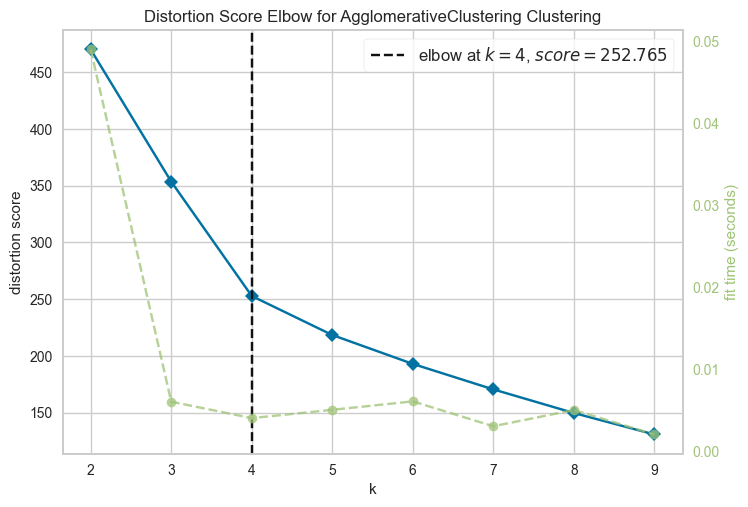

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), timings = True)
visualizer.fit(df_datos_std_clus.iloc[:,0:5])
visualizer.show()

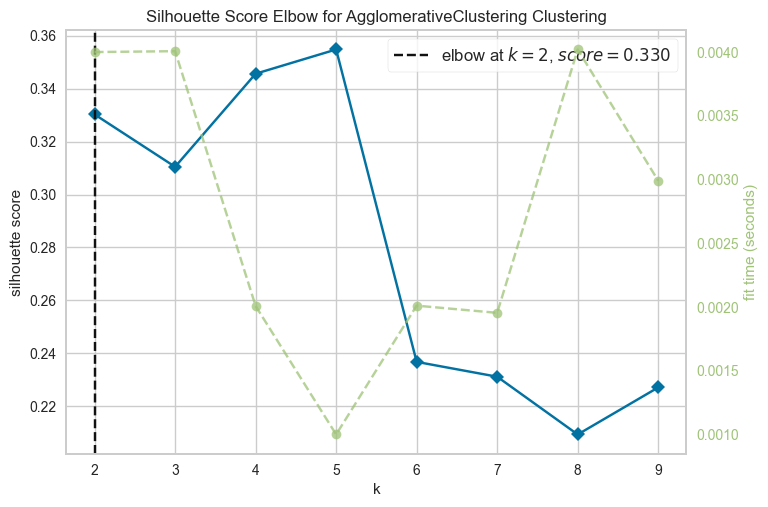

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [80]:
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_std_clus.iloc[:,0:5])
visualizer.show()

## df_datos_std_clust_st

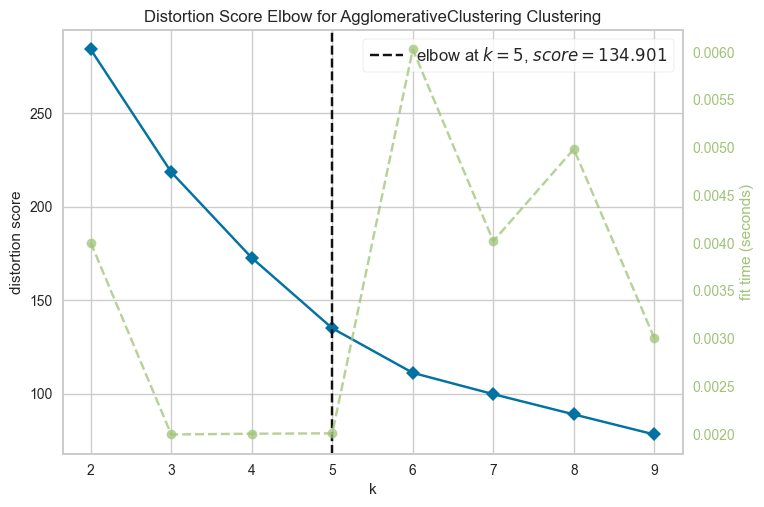

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), timings = True)
visualizer.fit(df_datos_std_clust_st.iloc[:,0:5])
visualizer.show()

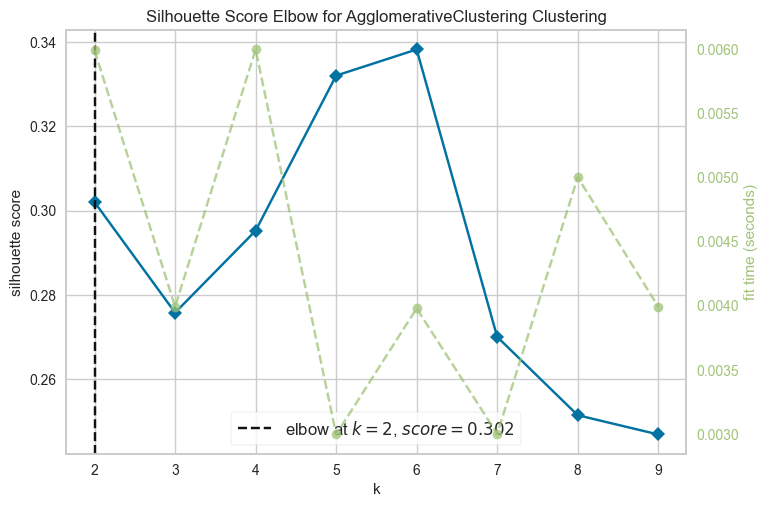

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [82]:
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_std_clust_st.iloc[:,0:5])
visualizer.show()

### df_datos_Ptrans_clus

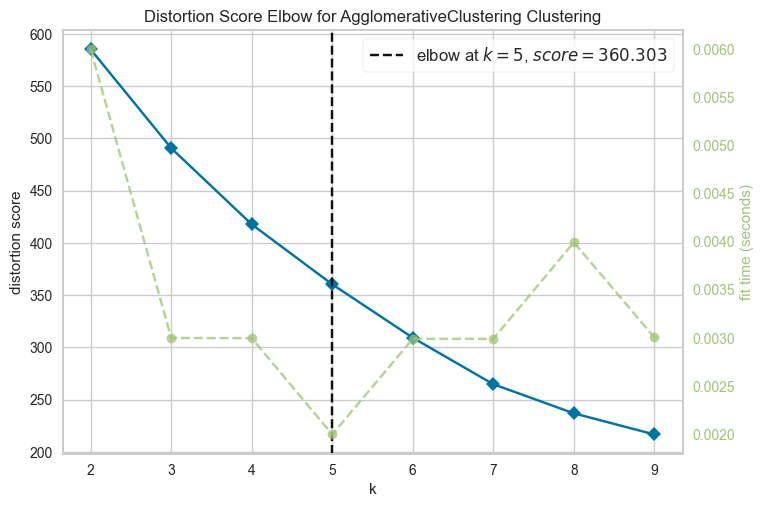

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), timings = True)
visualizer.fit(df_datos_Ptrans_clus.iloc[:,0:5])
visualizer.show()

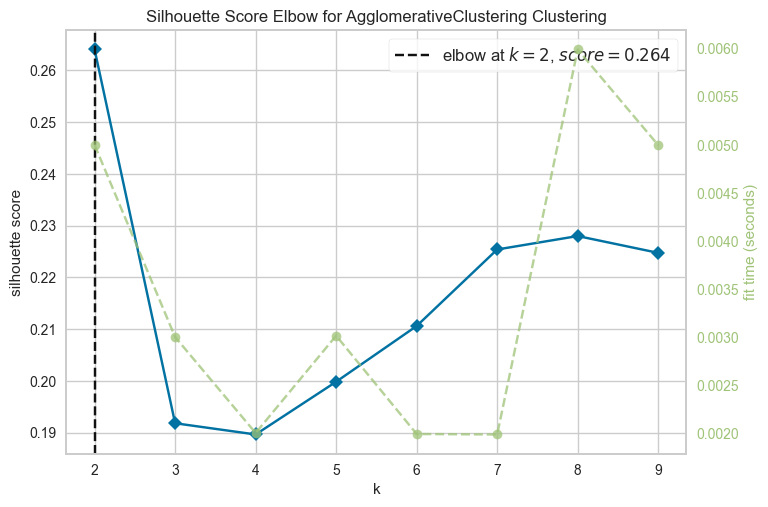

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [84]:
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_Ptrans_clus.iloc[:,0:5])
visualizer.show()

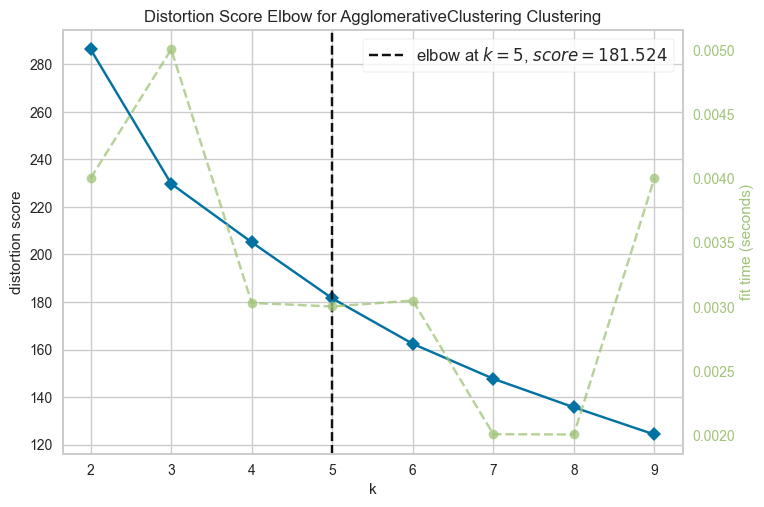

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), timings = True)
visualizer.fit(df_datos_Ptrans_clust_st.iloc[:,0:5])
visualizer.show()

### df_datos_Ptrans_clust_st

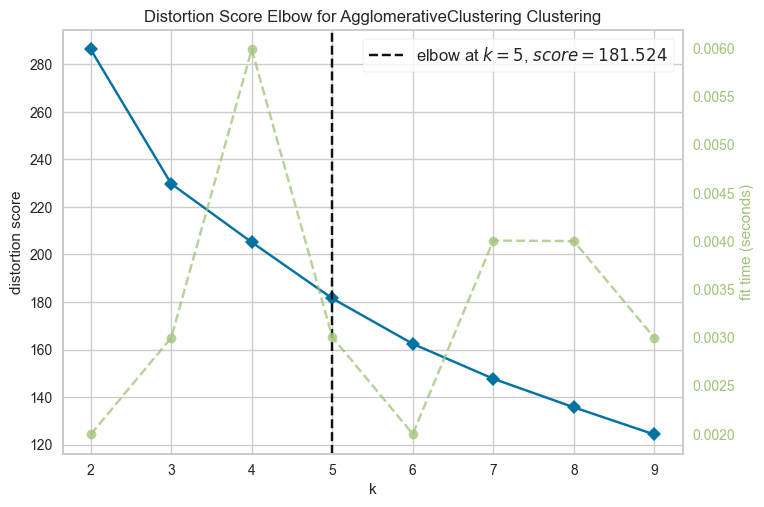

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [86]:
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), timings = True)
visualizer.fit(df_datos_Ptrans_clust_st.iloc[:,0:5])
visualizer.show()

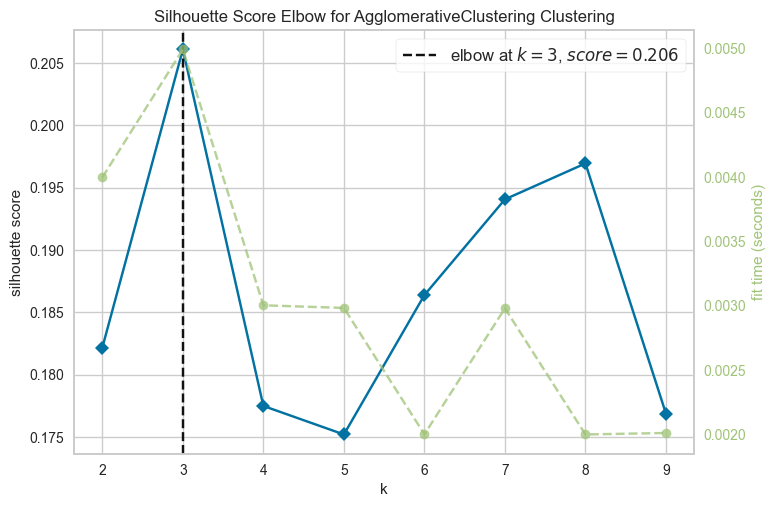

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [87]:
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_Ptrans_clust_st.iloc[:,0:5])
visualizer.show()

### IV. Agrupamiento por clusteres.

In [88]:
ag = AgglomerativeClustering(n_clusters = 5)

In [89]:
ag.fit(df_datos_std_clus.iloc[:,0:5])

AgglomerativeClustering(n_clusters=5)

In [90]:
df_datos_std_clus['Clusters'] = ag.labels_

In [91]:
df_datos_std_clus

F1        F2        F3        F4        F5  \
0  -1.074076 -0.499535 -0.262900  0.932916 -0.310524   
1  -1.512909 -0.130561 -0.666915 -0.677661  1.067688   
2  -1.090182 -0.146921 -1.215588  0.815330  5.759454   
3  -1.588110 -0.455778 -1.051343 -1.421749 -0.034796   
4  -0.482617 -1.057777 -0.332374  1.550306 -1.294706   
5  -0.729549 -1.008248  0.621534  2.551842 -0.793914   
6   1.082289 -0.572075  0.365246  0.427055 -0.667998   
7  -0.831704 -0.471799 -1.049527 -0.279668 -0.250629   
8  -1.904311 -1.011019 -0.116235  3.280585 -0.759328   
9   2.874770 -0.218637 -0.010930 -0.813983 -0.376222   
10  3.527003 -0.904513  5.212843  2.470414  3.275636   
11 -2.535878 -0.444890 -0.700876 -0.702097  0.199937   
12 -1.270688  0.435433 -0.751307 -0.583760 -0.301163   
13  1.722600 -0.059473 -1.024728 -2.044242  0.471975   
14  0.191055 -0.376096  1.043554  1.337410 -1.276427   
15  1.084290  0.486386 -0.291085 -0.699850 -0.509873   
16  0.129189  0.770519 -1.094840 -0.895447 -0.351503   
17  0.476278 -0.318118 -1.020626 -0.880741  0.817672   
18 -1.600686 -1.004359  1.154394  4.975210 -0.838343   
19 -0.108861 -0.579592 -0.002752 -0.443733  0.808056   
20 -0.421997 -0.159311 -1.090695 -1.005063  0.248050   
21 -1.806367 -0.443801 -0.155484  0.982840 -1.262195   
22 -1.068224 -0.921534  0.129479  1.920803 -1.817530   
23  0.032509 -0.511500 -0.615362 -1.474008 -1.169551   
24 -1.872815 -0.247750 -0.526410 -0.575999 -0.043980   
25 -1.639763 -0.833578  0.045320  0.290926  0.183303   
26  0.989480 -0.942158 -0.628882  0.336949  0.659504   
27  0.333073 -0.281645  0.210089 -0.428214  0.264008   
28 -0.303159 -0.638460 -1.027024 -0.709648  0.163283   
29  2.022114 -0.938332 -0.454326 -1.746985 -0.462644   
30 -0.223435  0.205131 -0.697789 -1.638575 -0.936073   
31  0.084895 -0.401742 -1.286055 -1.644621  0.346190   
32 -0.228016 -0.342308 -0.488568 -0.650501 -0.343491   
33 -0.672855  0.423042  0.310310  0.895381 -1.421949   
34  2.631586 -0.578444  1.375842  1.094535  0.010900   
35 -1.981437  2.319996 -0.822928 -1.570344 -0.283336   
36 -0.023545 -0.667323 -0.613063 -1.232501  1.055969   
37 -0.182894 -0.464355 -0.741801 -0.885645  0.084740   
38 -0.548094 -0.116512 -0.931061 -1.370931 -0.048313   
39  1.582975 -0.335658 -0.423460 -0.778850  0.012447   
40 -0.388558  0.290865  9.399072 -0.767747  3.701679   
41 -0.172103 -0.712171  2.012185  1.485031 -0.253297   
42 -1.140720 -1.120258  0.169586  2.836031 -1.719544   
43  2.816885 -0.497124 -0.574673 -0.687048 -0.524350   
44  0.089330  1.878946 -0.962516 -1.163698 -0.954948   
45 -1.293004 -0.088105 -0.685111 -1.020146 -0.112195   
46 -0.018046 -0.222642  2.460397  0.740719 -0.807545   
47 -0.363081 -1.115220  0.229434  2.286811 -0.276598   
48  0.096316 -0.903258 -0.396186 -0.814475  0.603458   
49 -1.033111 -0.648683 -1.118987 -1.159524 -0.075221   
50  1.448444 -0.497813  1.256209  1.813347  0.104810   
51 -1.197002  1.612737 -1.177459 -1.627513 -0.384709   
52  0.150161 -0.561583 -0.694127 -0.118997 -0.179459   
53  3.746515 -1.018882  0.431981  0.362497  0.165158   
54  0.053230 -0.434954 -0.583505 -1.502573 -0.123873   
55  1.231624 -1.045068  0.716140  3.139094 -1.020910   
56  4.677286 -0.196535 -0.971999 -1.549435 -1.295914   
57  1.234834 -1.046393  0.419481  1.167684 -0.262019   
58  0.538683 -0.435774 -0.395041 -0.331504  0.546771   
59  0.033346  0.527565 -1.174204 -1.286623 -0.210984   
60  0.558464  0.379875  2.251516 -1.192180  0.184803   
61 -0.775085 -0.725099 -1.410915 -1.427126  0.908307   
62 -0.363098  0.309824 -0.675021 -0.125600  1.789291   
63  3.230030 -0.856569  0.566828  1.344635 -0.081864   
64 -0.993495 -0.634526 -1.098345 -0.698290  0.039408   
65 -2.574198  1.919484 -1.150485  0.395843  0.559820   
66  2.879921 -0.711340  2.289709 -0.132142  0.509318   
67 -1.500864 -0.545220 -0.022218  0.255425  0.377898   
68  0.106029 -0.635265  1.683872  1.992273 -0.146678   
69  0.216693  0.142310 -1.029197 -1.271453 -0.432674   
70 -0.592758 -0.599232  1.408546  

B. std_st

In [92]:
ag_std_st = AgglomerativeClustering(n_clusters = 5)

In [93]:
df_datos_std_clust_st.iloc[:,0:5]

F1        F2        F3        F4        F5
0  -0.740666 -0.277288 -0.178945  0.625139 -0.281818
1  -1.029042  0.247822 -0.432873 -0.477303  0.929359
2  -0.751250  0.224539 -0.777721  0.544651  5.052495
3  -1.078461 -0.215014 -0.674491 -0.986632 -0.039508
4  -0.351992 -1.071756 -0.222610  1.047743 -1.146720
5  -0.514262 -1.001267  0.376933  1.733295 -0.706623
6   0.676376 -0.380523  0.215852  0.278876 -0.595967
7  -0.581393 -0.237815 -0.673350 -0.204876 -0.229182
8  -1.286250 -1.005211 -0.086764  2.232120 -0.676228
9   1.854294  0.122475 -0.020579 -0.570616 -0.339554
10  2.282905 -0.853636  3.262626  1.677558  2.869709
11 -1.701281 -0.199519 -0.454218 -0.494029  0.166777
12 -0.869869  1.053322 -0.485914 -0.413028 -0.273591
13  1.097153  0.348991 -0.657763 -1.412729  0.405844
14  0.090707 -0.101613  0.642177  0.902015 -1.130656
15  0.677692  1.125836 -0.196659 -0.492492 -0.457007
16  0.050053  1.530202 -0.701829 -0.626378 -0.317830
17  0.278140 -0.019102 -0.655185 -0.616312  0.709643
18 -1.086724 -0.995732  0.711841  3.392092 -0.745666
19 -0.106381 -0.391221 -0.015438 -0.317179  0.701193
20 -0.312156  0.206905 -0.699224 -0.701410  0.209059
21 -1.221887 -0.197969 -0.111433  0.659311 -1.118149
22 -0.736820 -0.877860  0.067670  1.301348 -1.606179
23 -0.013480 -0.294315 -0.400471 -1.022403 -1.036733
24 -1.265553  0.081043 -0.344564 -0.407715 -0.047578
25 -1.112404 -0.752683  0.014775  0.185695  0.152158
26  0.615387 -0.907211 -0.408969  0.217198  0.570646
27  0.184034  0.032805  0.118335 -0.306557  0.223083
28 -0.234063 -0.474999 -0.659206 -0.499198  0.134565
29  1.293976 -0.901766 -0.299258 -1.209256 -0.415501
30 -0.181672  0.725565 -0.452278 -1.135050 -0.831552
31  0.020945 -0.138113 -0.822010 -1.139188  0.295304
32 -0.184683 -0.053528 -0.320780 -0.458712 -0.310790
33 -0.477006  1.035687  0.181324  0.599445 -1.258541
34  1.694487 -0.389588  0.851024  0.735767  0.000650
35 -1.336933  3.735357 -0.530929 -1.088345 -0.257925
36 -0.050316 -0.516077 -0.399026 -0.857092  0.919060
37 -0.155031 -0.227221 -0.479940 -0.619668  0.065541
38 -0.395020  0.267816 -0.598892 -0.951847 -0.051386
39  1.005399 -0.044064 -0.279859 -0.546567  0.002010
40 -0.290182  0.847579  5.893722 -0.538967  3.244117
41 -0.147940 -0.579902  1.250974  1.003061 -0.231527
42 -0.784461 -1.160676  0.092878  1.927822 -1.520068
43  1.816255 -0.273856 -0.374898 -0.483729 -0.469729
44  0.023859  3.107673 -0.618662 -0.809996 -0.848139
45 -0.884533  0.308244 -0.444309 -0.711734 -0.107526
46 -0.046702  0.116776  1.532680  0.493579 -0.718602
47 -0.273440 -1.153506  0.130493  1.551881 -0.252004
48  0.028450 -0.851851 -0.262717 -0.570952  0.521392
49 -0.713746 -0.489549 -0.717006 -0.807139 -0.075033
50  0.916993 -0.274837  0.775833  1.227795  0.083178
51 -0.821446  2.728814 -0.753756 -1.127478 -0.347012
52  0.063834 -0.365591 -0.449976 -0.094897 -0.166638
53  2.427157 -1.016401  0.257796  0.234686  0.136213
54  0.000136 -0.185378 -0.380449 -1.041956 -0.117789
55  0.774511 -1.053668  0.436394  2.135270 -0.906107
56  3.038807  0.153929 -0.624622 -1.074033 -1.147782
57  0.776620 -1.055554  0.249940  0.785838 -0.239191
58  0.319149 -0.186545 -0.261997 -0.240358  0.471575
59 -0.012930  1.184441 -0.751711 -0.894138 -0.194342
60  0.332148  0.974253  1.401396 -0.829492  0.153477
61 -0.544186 -0.598301 -0.900486 -0.990313  0.789294
62 -0.273451  0.874560 -0.437968 -0.099417  1.563506
63  2.087751 -0.785404  0.342549  0.906960 -0.080870
64 -0.687713 -0.469401 -0.704032 -0.491423  0.025703
65 -1.726462  3.165364 -0.736803  0.257511  0.483043
66  1.857679 -0.578720  1.425401 -0.103894  0.438661
67 -1.021127 -0.342304 -0.027674  0.161395  0.323170
68  0.034833 -0.470453  1.044625  1.350269 -0.137830
69  0.107555  0.636161 -0.660572 -0.883754 -0.389164
70 -0.424371 -0.419172  0.871579  1.179930  0.183610

In [94]:
ag_std_st.fit(df_datos_std_clust_st.iloc[:,0:5])

AgglomerativeClustering(n_clusters=5)

In [95]:
df_datos_std_clust_st['Clusters'] = ag_std_st.labels_

In [96]:
df_datos_std_clust_st

F1        F2        F3        F4        F5  \
0  -0.740666 -0.277288 -0.178945  0.625139 -0.281818   
1  -1.029042  0.247822 -0.432873 -0.477303  0.929359   
2  -0.751250  0.224539 -0.777721  0.544651  5.052495   
3  -1.078461 -0.215014 -0.674491 -0.986632 -0.039508   
4  -0.351992 -1.071756 -0.222610  1.047743 -1.146720   
5  -0.514262 -1.001267  0.376933  1.733295 -0.706623   
6   0.676376 -0.380523  0.215852  0.278876 -0.595967   
7  -0.581393 -0.237815 -0.673350 -0.204876 -0.229182   
8  -1.286250 -1.005211 -0.086764  2.232120 -0.676228   
9   1.854294  0.122475 -0.020579 -0.570616 -0.339554   
10  2.282905 -0.853636  3.262626  1.677558  2.869709   
11 -1.701281 -0.199519 -0.454218 -0.494029  0.166777   
12 -0.869869  1.053322 -0.485914 -0.413028 -0.273591   
13  1.097153  0.348991 -0.657763 -1.412729  0.405844   
14  0.090707 -0.101613  0.642177  0.902015 -1.130656   
15  0.677692  1.125836 -0.196659 -0.492492 -0.457007   
16  0.050053  1.530202 -0.701829 -0.626378 -0.317830   
17  0.278140 -0.019102 -0.655185 -0.616312  0.709643   
18 -1.086724 -0.995732  0.711841  3.392092 -0.745666   
19 -0.106381 -0.391221 -0.015438 -0.317179  0.701193   
20 -0.312156  0.206905 -0.699224 -0.701410  0.209059   
21 -1.221887 -0.197969 -0.111433  0.659311 -1.118149   
22 -0.736820 -0.877860  0.067670  1.301348 -1.606179   
23 -0.013480 -0.294315 -0.400471 -1.022403 -1.036733   
24 -1.265553  0.081043 -0.344564 -0.407715 -0.047578   
25 -1.112404 -0.752683  0.014775  0.185695  0.152158   
26  0.615387 -0.907211 -0.408969  0.217198  0.570646   
27  0.184034  0.032805  0.118335 -0.306557  0.223083   
28 -0.234063 -0.474999 -0.659206 -0.499198  0.134565   
29  1.293976 -0.901766 -0.299258 -1.209256 -0.415501   
30 -0.181672  0.725565 -0.452278 -1.135050 -0.831552   
31  0.020945 -0.138113 -0.822010 -1.139188  0.295304   
32 -0.184683 -0.053528 -0.320780 -0.458712 -0.310790   
33 -0.477006  1.035687  0.181324  0.599445 -1.258541   
34  1.694487 -0.389588  0.851024  0.735767  0.000650   
35 -1.336933  3.735357 -0.530929 -1.088345 -0.257925   
36 -0.050316 -0.516077 -0.399026 -0.857092  0.919060   
37 -0.155031 -0.227221 -0.479940 -0.619668  0.065541   
38 -0.395020  0.267816 -0.598892 -0.951847 -0.051386   
39  1.005399 -0.044064 -0.279859 -0.546567  0.002010   
40 -0.290182  0.847579  5.893722 -0.538967  3.244117   
41 -0.147940 -0.579902  1.250974  1.003061 -0.231527   
42 -0.784461 -1.160676  0.092878  1.927822 -1.520068   
43  1.816255 -0.273856 -0.374898 -0.483729 -0.469729   
44  0.023859  3.107673 -0.618662 -0.809996 -0.848139   
45 -0.884533  0.308244 -0.444309 -0.711734 -0.107526   
46 -0.046702  0.116776  1.532680  0.493579 -0.718602   
47 -0.273440 -1.153506  0.130493  1.551881 -0.252004   
48  0.028450 -0.851851 -0.262717 -0.570952  0.521392   
49 -0.713746 -0.489549 -0.717006 -0.807139 -0.075033   
50  0.916993 -0.274837  0.775833  1.227795  0.083178   
51 -0.821446  2.728814 -0.753756 -1.127478 -0.347012   
52  0.063834 -0.365591 -0.449976 -0.094897 -0.166638   
53  2.427157 -1.016401  0.257796  0.234686  0.136213   
54  0.000136 -0.185378 -0.380449 -1.041956 -0.117789   
55  0.774511 -1.053668  0.436394  2.135270 -0.906107   
56  3.038807  0.153929 -0.624622 -1.074033 -1.147782   
57  0.776620 -1.055554  0.249940  0.785838 -0.239191   
58  0.319149 -0.186545 -0.261997 -0.240358  0.471575   
59 -0.012930  1.184441 -0.751711 -0.894138 -0.194342   
60  0.332148  0.974253  1.401396 -0.829492  0.153477   
61 -0.544186 -0.598301 -0.900486 -0.990313  0.789294   
62 -0.273451  0.874560 -0.437968 -0.099417  1.563506   
63  2.087751 -0.785404  0.342549  0.906960 -0.080870   
64 -0.687713 -0.469401 -0.704032 -0.491423  0.025703   
65 -1.726462  3.165364 -0.736803  0.257511  0.483043   
66  1.857679 -0.578720  1.425401 -0.103894  0.438661   
67 -1.021127 -0.342304 -0.027674  0.161395  0.323170   
68  0.034833 -0.470453  1.044625  1.350269 -0.137830   
69  0.107555  0.636161 -0.660572 -0.883754 -0.389164   
70 -0.424371 -0.419172  0.871579  

#### df_datos_Ptrans

In [97]:
ag_Ptrans = AgglomerativeClustering(n_clusters = 5)
ag_Ptrans.fit(df_datos_Ptrans_clus.iloc[:,0:5])


AgglomerativeClustering(n_clusters=5)

In [98]:
df_datos_Ptrans_clus['Clusters'] = ag_Ptrans.labels_

In [99]:
df_datos_Ptrans_clus

F1        F2        F3        F4        F5  \
0  -1.365156  1.000541  0.304281 -0.601667 -0.000315   
1  -2.622521  0.390124 -0.251061  0.922385 -0.180540   
2  -4.052041  0.307722 -1.950349 -0.883795 -0.180540   
3  -1.984283  0.026269 -1.032810  1.018108  0.055379   
4  -0.023197  1.415432 -0.250477 -1.500546 -1.400094   
5  -1.157816  2.783740  1.610790 -0.792782 -0.247423   
6   2.526739  0.709058  1.020115 -0.614109  0.088337   
7   0.587123 -1.036006 -1.863909 -0.412458  0.629338   
8  -2.345438  1.178417  0.302793 -1.774909 -1.623744   
9   3.560697  0.464520  0.651482  0.221293  0.600055   
10  2.975019  3.184224  3.626869  0.783668 -0.510722   
11 -3.391408  0.346931 -0.193953  0.960517 -1.146820   
12 -0.844211 -3.742633 -0.849011 -0.336204  0.445269   
13  2.494343  0.675207 -1.128089  1.867214 -0.702055   
14  0.666160 -1.971054  1.570885 -0.935035 -0.386465   
15  0.807337 -2.270024  0.351360 -0.035490  1.128807   
16  1.446102 -0.132437 -2.379417 -0.280542  1.306385   
17  0.755012 -1.902426 -1.664203 -0.185728  0.025683   
18 -1.742602  3.941250  1.849269 -1.376235 -1.264882   
19  0.677471  0.933534  0.920935  0.203993  0.846799   
20  0.609557  0.770173 -2.113404  0.162762  0.991128   
21 -1.667949 -1.416859 -0.171339 -0.951935 -0.697431   
22 -1.332345  0.568363  0.938424 -1.170055 -0.924454   
23 -1.619468 -1.042277 -0.274386  1.242708 -0.988725   
24 -1.012308 -0.204975 -0.183744  0.360980 -0.333323   
25 -1.955981 -0.841405  1.006760 -0.173960 -0.375405   
26  1.086703  3.155852 -0.760179 -0.480496  0.344095   
27  0.958847 -0.640254  1.143442  0.204104  0.584491   
28 -1.041320  0.131689 -1.594750  0.015140  0.495632   
29  2.341599  0.524989  0.285961  1.489813 -0.794023   
30  0.550113 -2.663982 -0.434993  0.790492  0.539550   
31 -0.237239  1.277426 -2.673402  0.986338 -0.556249   
32  1.412053  0.397669 -0.406418 -0.059615  1.029592   
33 -0.748689 -1.538629  0.904961 -0.718162  0.208610   
34  3.554680  2.208080  2.077725 -0.396728  0.360682   
35 -2.336548 -4.102866 -0.537757  1.091332  0.611743   
36 -0.070739 -1.128542 -0.174474  0.634546  0.308810   
37 -0.934118  0.376660 -0.519896  0.471935  0.200100   
38 -1.227307  1.427132 -0.717432  1.446424 -0.320921   
39  2.389703  1.798594 -0.224689  0.326644  0.648325   
40  0.513668 -0.037494  4.223182  0.906107  0.687089   
41  0.722999  2.389595  2.533750 -0.561187  0.509809   
42 -2.265613  1.034622  0.739430 -1.251480 -1.168951   
43  2.800282 -0.451439 -0.516594 -0.176809  1.013610   
44  1.985195 -1.599456 -2.181452 -0.035867  0.996535   
45 -0.871666 -1.099715 -0.271875  0.310201  0.914837   
46 -0.530872 -0.388126  2.603561 -0.780181 -0.023367   
47  1.331241  3.982486  0.500921 -1.491738 -1.412092   
48  0.135628  0.164276  0.409476  0.442064 -0.332786   
49 -0.981879 -0.778965 -1.636299  0.228590 -0.092007   
50  0.739569  0.443240  2.012770 -0.537642  0.428882   
51 -0.550755 -4.980511 -1.698323  0.509113  0.510189   
52  0.434602 -1.370989 -1.106214 -0.794384 -0.366172   
53  3.713772  2.689873  1.003730 -0.101916  0.442177   
54  0.059594 -0.424453 -0.009724  1.152804  0.023874   
55  2.014451  6.092948  0.881093 -1.197158 -0.953010   
56  5.011037 -2.025688 -1.247752  0.272558 -0.757427   
57  3.065691  4.458743  1.026451 -0.385152 -0.085257   
58 -0.380276 -0.119592  0.242154 -0.009792  0.537734   
59 -0.298018 -0.361111 -2.392914  0.389441  1.360159   
60 -0.093736 -0.913584  2.707093  0.672340  1.379548   
61 -0.622870 -0.323700 -3.310235  0.367348 -0.185886   
62 -2.089571 -1.601228 -0.432634 -0.357082  1.169821   
63  3.016681  3.555071  1.176688 -0.498441  0.044070   
64 -0.670746 -0.420114 -3.052799 -0.269503 -0.483972   
65 -4.619863 -4.430534 -1.919346 -0.835059  0.036966   
66  2.811532  0.690118  2.705931  0.970081 -0.739169   
67 -2.700306 -0.360609  0.955561  0.397307  0.175226   
68  0.122695 -0.902113  2.050581 -1.172823 -0.949600   
69  0.428106 -2.944324 -1.639736  0.124798  0.456029   
70 -1.857932  1.567784  2.226314  

#### df_datos_Ptrans_st

In [100]:
ag_Ptrans_st = AgglomerativeClustering(n_clusters = 5)
ag_Ptrans_st.fit(df_datos_Ptrans_clust_st.iloc[:,0:5])

AgglomerativeClustering(n_clusters=5)

In [101]:
df_datos_Ptrans_clust_st['Clusters'] = ag_Ptrans_st.labels_

### Numero de elementos por clusters

In [102]:
df_datos_std_clus['Clusters'].value_counts()

0    40
2    17
3    11
1     2
4     1
Name: Clusters, dtype: int64

In [103]:
df_datos_std_clus_melt = df_datos_std_clus.loc[:,['F1','F2','F3','F4','F5','Clusters']].melt(id_vars = 'Clusters')


In [105]:
df_datos_std_clus_melt

Clusters variable     value
0           0       F1 -1.074076
1           0       F1 -1.512909
2           4       F1 -1.090182
3           0       F1 -1.588110
4           2       F1 -0.482617
5           2       F1 -0.729549
6           2       F1  1.082289
7           0       F1 -0.831704
8           2       F1 -1.904311
9           3       F1  2.874770
10          1       F1  3.527003
11          0       F1 -2.535878
12          0       F1 -1.270688
13          3       F1  1.722600
14          2       F1  0.191055
15          3       F1  1.084290
16          0       F1  0.129189
17          0       F1  0.476278
18          2       F1 -1.600686
19          0       F1 -0.108861
20          0       F1 -0.421997
21          0       F1 -1.806367
22          2       F1 -1.068224
23          0       F1  0.032509
24          0       F1 -1.872815
25          0       F1 -1.639763
26          0       F1  0.989480
27          0       F1  0.333073
28          0       F1 -0.303159
29          3       F1  2.022114
30          0       F1 -0.223435
31          0       F1  0.084895
32          0       F1 -0.228016
33          2       F1 -0.672855
34          3       F1  2.631586
35          0       F1 -1.981437
36          0       F1 -0.023545
37          0       F1 -0.182894
38          0       F1 -0.548094
39          3       F1  1.582975
40          1       F1 -0.388558
41          2       F1 -0.172103
42          2       F1 -1.140720
43          3       F1  2.816885
44          0       F1  0.089330
45          0       F1 -1.293004
46          2       F1 -0.018046
47          2       F1 -0.363081
48          0       F1  0.096316
49          0       F1 -1.033111
50          2       F1  1.448444
51          0       F1 -1.197002
52          0       F1  0.150161
53          3       F1  3.746515
54          0       F1  0.053230
55          2       F1  1.231624
56          3       F1  4.677286
57          2       F1  1.234834
58          0       F1  0.538683
59          0       F1  0.033346
60          0       F1  0.558464
61          0       F1 -0.775085
62          0       F1 -0.363098
63          3       F1  3.230030
64          0       F1 -0.993495
65          0       F1 -2.574198
66          3       F1  2.879921
67          0       F1 -1.500864
68          2       F1  0.106029
69          0       F1  0.216693
70          2       F1 -0.592758
71          0       F2 -0.499535
72          0       F2 -0.130561
73          4       F2 -0.146921
74          0       F2 -0.455778
75          2       F2 -1.057777
76          2       F2 -1.008248
77          2       F2 -0.572075
78          0       F2 -0.471799
79          2       F2 -1.011019
80          3       F2 -0.218637
81          1       F2 -0.904513
82          0       F2 -0.444890
83          0       F2  0.435433
84          3       F2 -0.059473
85          2       F2 -0.376096
86          3       F2  0.486386
87          0       F2  0.770519
88          0       F2 -0.318118
89          2       F2 -1.004359
90          0       F2 -0.579592
91          0       F2 -0.159311
92          0       F2 -0.443801
93          2       F2 -0.921534
94          0       F2 -0.511500
95          0       F2 -0.247750
96          0       F2 -0.833578
97          0       F2 -0.942158
98          0       F2 -0.281645
99          0       F2 -0.638460
100         3       F2 -0.938332
101         0       F2  0.205131
102         0       F2 -0.401742
103         0       F2 -0.342308
104         2       F2  0.423042
105         3       F2 -0.578444
106         0       F2  2.319996
107         0       F2 -0.667323
108         0       F2 -0.464355
109         0       F2 -0.116512
110         3       F2 -0.335658
111         1       F2  0.290865
112         2       F2 -0.712171
113         2       F2 -1.120258
114         3       F2 -0.497124
115         0       F2  1.878946
116         0       F2 -0.088105
117         2       F2 -0.222642
118         2       F2 -1.115220
119         0       F2 -0.903258
120         

In [106]:
import seaborn.objects as so
from seaborn import axes_style

In [107]:
df_datos_std_clus['Clusters'].value_counts()

0    40
2    17
3    11
1     2
4     1
Name: Clusters, dtype: int64

In [108]:
df_datos_std_clus_melt_mean = df_datos_std_clus_melt.groupby(['variable','Clusters'])['value'].mean().reset_index()
#df_datos_MM_clus_melt.groupby(['variable','cluster'])['value'].mean().reset_index()

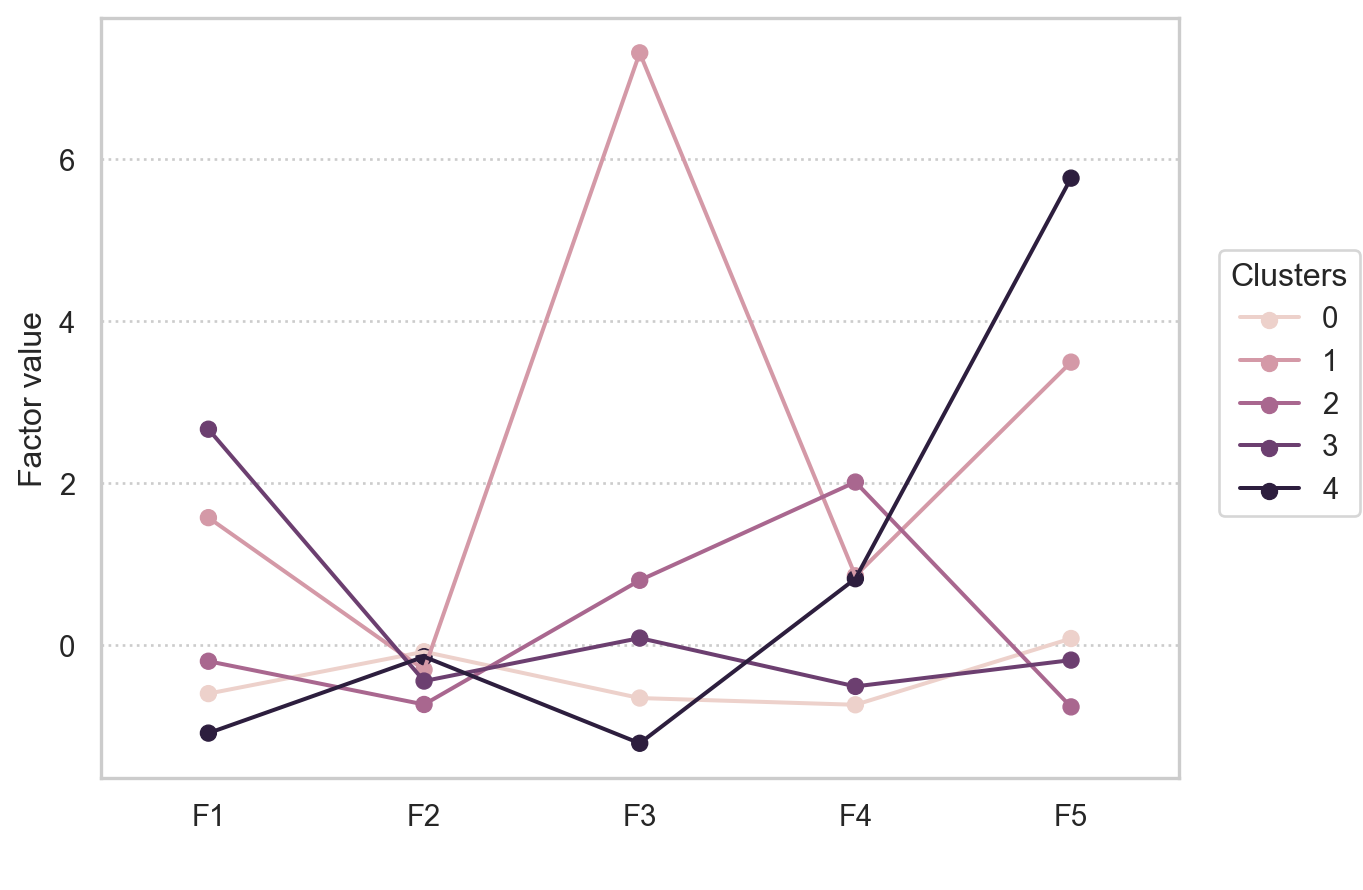

In [109]:
(so.Plot(df_datos_std_clus_melt_mean, x ='variable', y = 'value', color = 'Clusters').theme({**axes_style("whitegrid"), "grid.linestyle": ":" })
 .add(so.Dot())
 .add(so.Line())
 .label(
     x = " ",
     y = "Factor value"
 )
)

In [110]:
df_datos_std_clust_st['Clusters'].value_counts()

1    38
2    16
3    10
4     4
0     3
Name: Clusters, dtype: int64

In [112]:
df_datos_std_clust_st_melt = df_datos_std_clust_st.loc[:,['F1','F2','F3','F4','F5','Clusters']].melt(id_vars = 'Clusters')


In [113]:
df_datos_std_clust_st_melt_mean = df_datos_std_clust_st_melt.groupby(['variable','Clusters'])['value'].mean().reset_index()


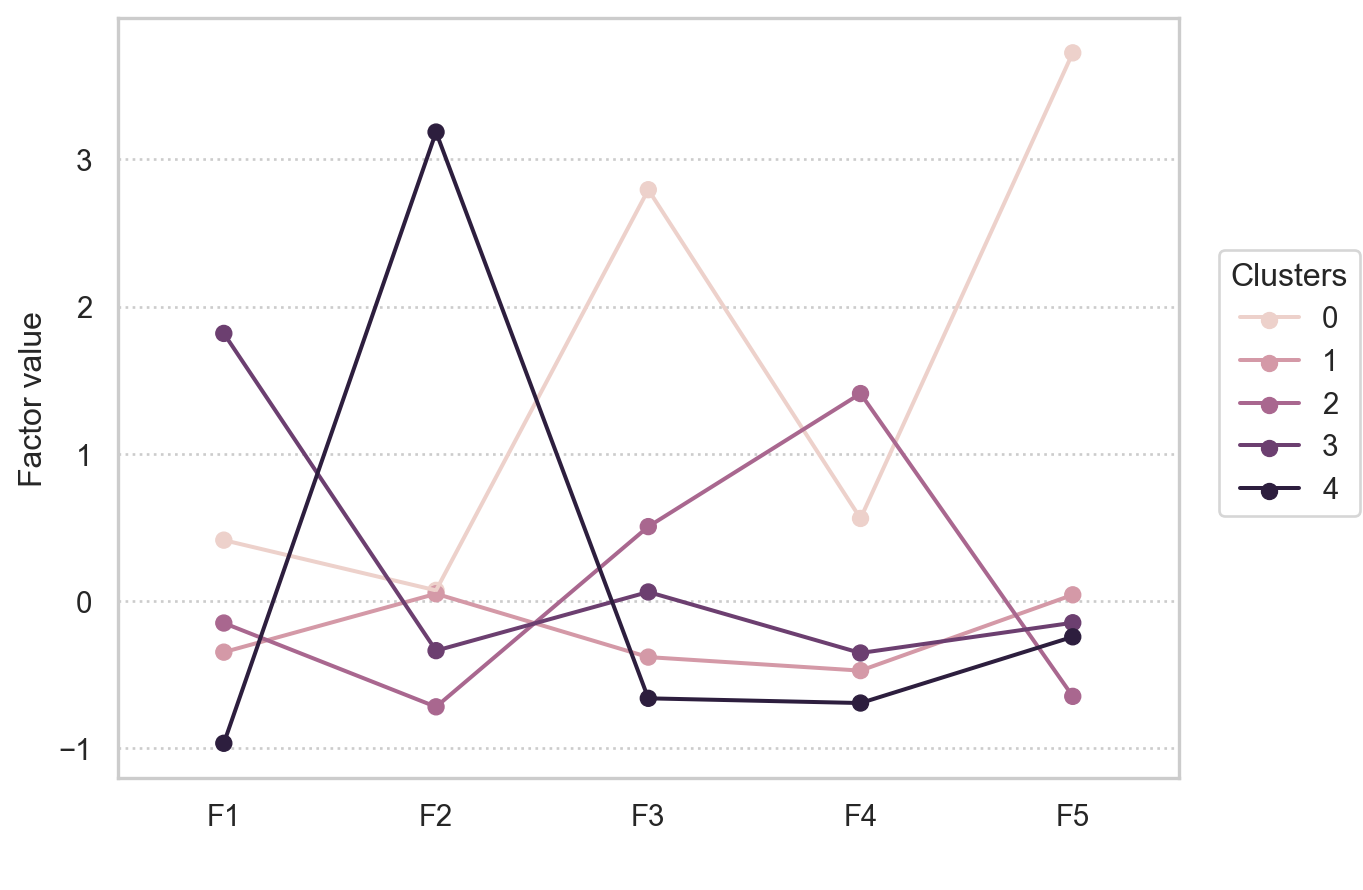

In [114]:
(
    so.Plot(df_datos_std_clust_st_melt_mean, x = 'variable', y = 'value', 
            color = "Clusters").theme({**axes_style('whitegrid'),"grid.linestyle" : ":"})
    .add(so.Dot())
    .add(so.Line())
    .label(
        x = " ",
        y = "Factor value"
    )
)

In [115]:
df_datos_Ptrans_clus['Clusters'].value_counts()

2    25
0    17
1    16
3     9
4     4
Name: Clusters, dtype: int64

In [116]:
df_datos_Ptrans_clus_melt = df_datos_Ptrans_clus.loc[:,['F1','F2','F3','F4','F5', 'Clusters']].melt(id_vars = 'Clusters')
df_datos_Ptrans_clus_melt_mean = df_datos_Ptrans_clus_melt.groupby(['variable','Clusters'])['value'].mean().reset_index()


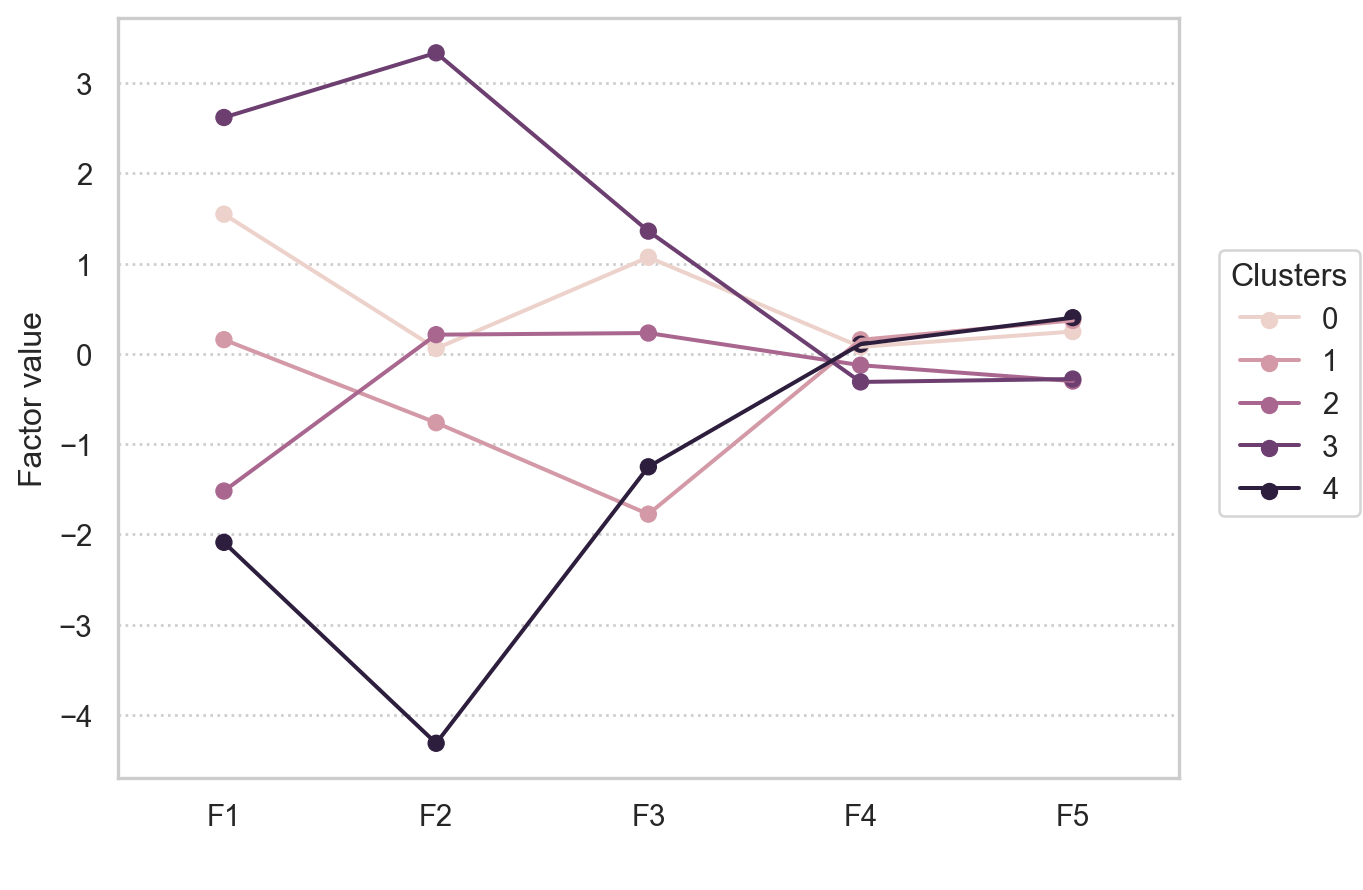

In [117]:
(
    so.Plot(df_datos_Ptrans_clus_melt_mean, x = 'variable', y = 'value', color = 'Clusters').theme( 
            {**axes_style('whitegrid'), "grid.linestyle" : ":"})
    .add(so.Dot())
    .add(so.Line())
    .label(
        x = " ",
        y = "Factor value"
    )
)

In [118]:
df_datos_Ptrans_clust_st['Clusters'].value_counts()

3    25
2    20
0    11
1     8
4     7
Name: Clusters, dtype: int64

In [119]:
df_datos_Ptrans_clust_st_melt = df_datos_Ptrans_clust_st.loc[:,['F1','F2','F3','F4','F5', 'Clusters']].melt(id_vars = 'Clusters')
df_datos_Ptrans_clust_st_melt_mean = df_datos_Ptrans_clust_st_melt.groupby(['variable','Clusters'])['value'].mean().reset_index()

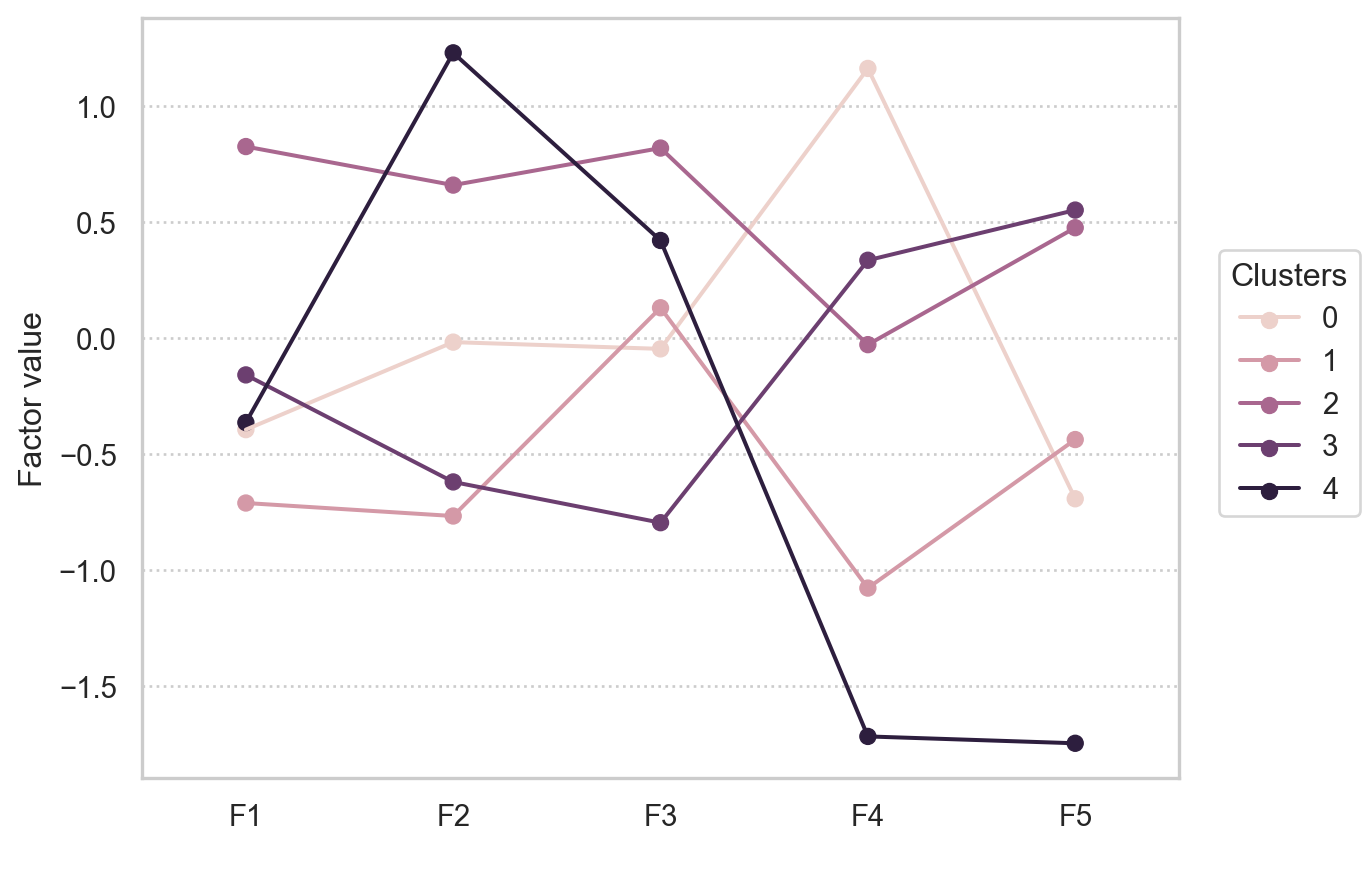

In [120]:
(
    so.Plot(df_datos_Ptrans_clust_st_melt_mean, x = 'variable', y = 'value', color = 'Clusters').theme( 
            {**axes_style('whitegrid'), "grid.linestyle" : ":"})
    .add(so.Dot())
    .add(so.Line())
    .label(
        x = " ",
        y = "Factor value"
    )
)

## IV. REPRESENTACION GRAFICA

In [121]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns


In [125]:
fig = px.scatter(df_datos_std_clus,x='F3', y='F5', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [124]:
fig = px.scatter(df_datos_std_clus,x='F1', y='F2', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [123]:
fig = px.scatter(df_datos_std_clus,x='F1', y='F3', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [96]:
fig = px.scatter(df_datos_std_clus,x='F1', y='F4', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [99]:
fig = px.scatter(df_datos_std_clus,x='F1', y='F5', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [101]:
fig = px.scatter(df_datos_std_clus,x='F1', y='F5', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

df_datos_st_clust_st

In [126]:
df_datos_std_clust_st['Clusters'].value_counts()


1    38
2    16
3    10
4     4
0     3
Name: Clusters, dtype: int64

In [127]:
fig = px.scatter(df_datos_std_clust_st,x='F1', y='F2', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [133]:
fig = px.scatter(df_datos_std_clust_st,x='F1', y='F3', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [134]:
fig = px.scatter(df_datos_std_clust_st,x='F1', y='F4', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [135]:
fig = px.scatter(df_datos_std_clust_st,x='F1', y='F5', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [136]:
fig = px.scatter(df_datos_std_clust_st,x='F2', y='F3', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [117]:
fig = px.scatter(df_datos_std_clust_st,x='F2', y='F4', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [137]:
fig = px.scatter(df_datos_std_clust_st,x='F2', y='F5', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [138]:
fig = px.scatter(df_datos_std_clust_st,x='F3', y='F4', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [139]:
fig = px.scatter(df_datos_std_clust_st,x='F3', y='F5', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [121]:
fig = px.scatter(df_datos_std_clust_st,x='F4', y='F5', color ='Clusters', hover_data = ["Ciudades",'Clusters'])
fig.show()

In [126]:
df_datos_std_clust_st

F1        F2        F3        F4        F5           Ciudades  \
0  -0.740666 -0.277288 -0.178945  0.625139 -0.281818           Albacete   
1  -1.029042  0.247822 -0.432873 -0.477303  0.929359  Alcalá de Henares   
2  -0.751250  0.224539 -0.777721  0.544651  5.052495         Alcobendas   
3  -1.078461 -0.215014 -0.674491 -0.986632 -0.039508           Alcorcón   
4  -0.351992 -1.071756 -0.222610  1.047743 -1.146720          Algeciras   
..       ...       ...       ...       ...       ...                ...   
66  1.857679 -0.578720  1.425401 -0.103894  0.438661                NaN   
67 -1.021127 -0.342304 -0.027674  0.161395  0.323170           Valencia   
68  0.034833 -0.470453  1.044625  1.350269 -0.137830         Valladolid   
69  0.107555  0.636161 -0.660572 -0.883754 -0.389164               Vigo   
70 -0.424371 -0.419172  0.871579  1.179930  0.183610             Zamora   

    Clusters  
0          1  
1          1  
2          0  
3          1  
4          2  
..       ...  
66         3  
67         1  
68         2  
69         1  
70         2  

[71 rows x 7 columns]